In [1]:
import sys
import csv
import io
import math
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import ordpy

sys.path.append('../bin')
from bin.functions import *
np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
df_res = pd.read_csv("all_result.csv", index_col=0)
df_res

V1  perm_ent3  perm_ent4            mse      mape  sym_test  \
0        Y1   0.697843   0.539401    4993.838193  0.009190     False   
1        Y2   0.816579   0.705971   12899.948420  0.084814     False   
2        Y3   0.000000   0.000000    3476.611770  0.005390     False   
3        Y4   0.166740   0.144179   16100.535285  0.010972     False   
4        Y5   0.478736   0.395644   10617.608987  0.010394     False   
...     ...        ...        ...            ...       ...       ...   
4222  D4223        NaN   0.907049   33883.253502  0.051424      True   
4223  D4224        NaN   0.933608    1112.812688  0.007694      True   
4224  D4225        NaN   0.910326    1858.370496  0.007457     False   
4225  D4226        NaN   0.946536      27.140520  0.003027      True   
4226  D4227        NaN   0.931121  180646.444982  0.023135     False   

      w_perm_ent4     smape      mase  
0       -0.000000  0.009146  0.600416  
1       -0.000000  0.088896  0.552155  
2       -0.000000  0.005387  0.254877  
3       -0.000000  0.010918  0.510635  
4       -0.000000  0.010289  0.436703  
...           ...       ...       ...  
4222     0.175517  0.052152  3.794788  
4223     0.572596  0.007734  0.500734  
4224     0.552355  0.007506  0.022866  
4225     0.666145  0.003028  0.340748  
4226     0.386112  0.022877  3.221155  

[100000 rows x 9 columns]

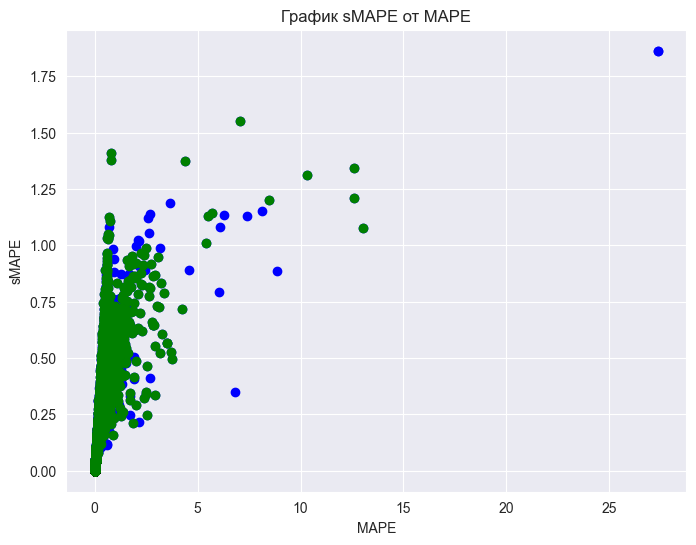

In [6]:
symmetry_ts = df_res.loc[df_res['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_res['mape'], df_res["smape"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['smape'], color='green', label='Highlight', zorder=5)
plt.title('График sMAPE от MAPE')
plt.xlabel('MAPE')
plt.ylabel('sMAPE')
#plt.semilogx()
plt.grid(True)
plt.show()

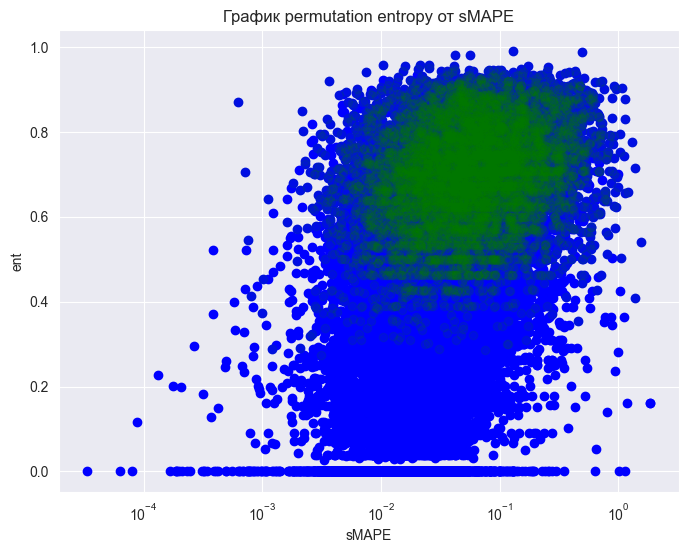

In [10]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['smape'], df_year["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', alpha=0.1)
plt.semilogx()
plt.title('График permutation entropy от sMAPE')
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

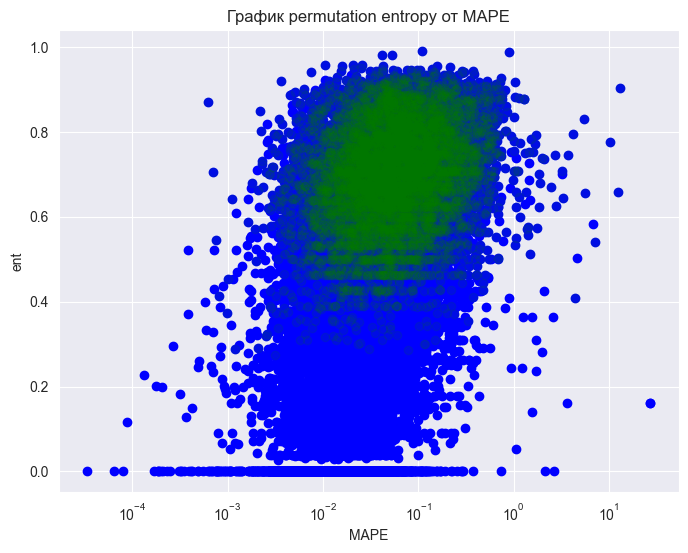

In [11]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['mape'], df_year["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha = 0.1)
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

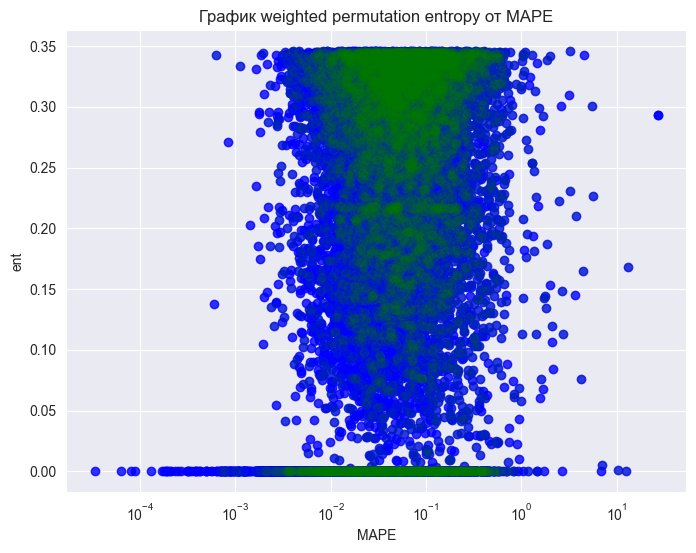

In [8]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['mape'], df_year["w_perm_ent4"], color='blue', alpha=0.8)
plt.scatter(symmetry_ts['mape'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha=0.1)
plt.semilogx()
plt.title('График weighted permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

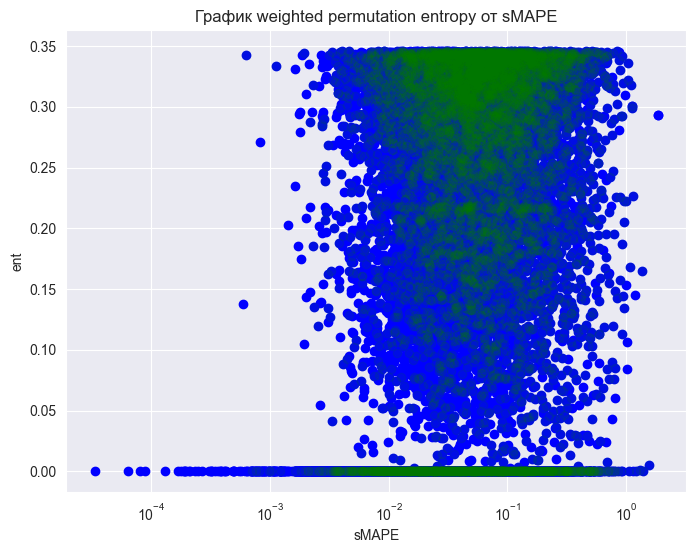

In [14]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['smape'], df_year["w_perm_ent4"], color='blue', alpha=1)
plt.scatter(symmetry_ts['smape'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha=0.1)
plt.semilogx()
plt.title('График weighted permutation entropy от sMAPE')
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

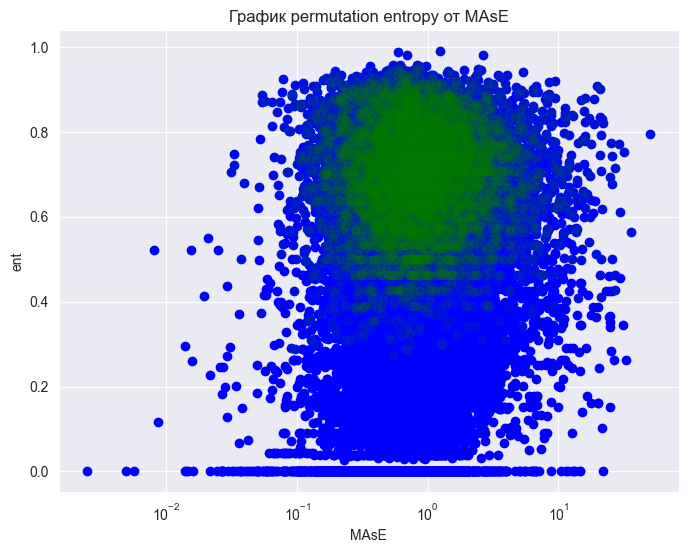

In [17]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['mase'], df_year["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha=0.1)
plt.semilogx()
plt.title('График permutation entropy от MAsE')
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

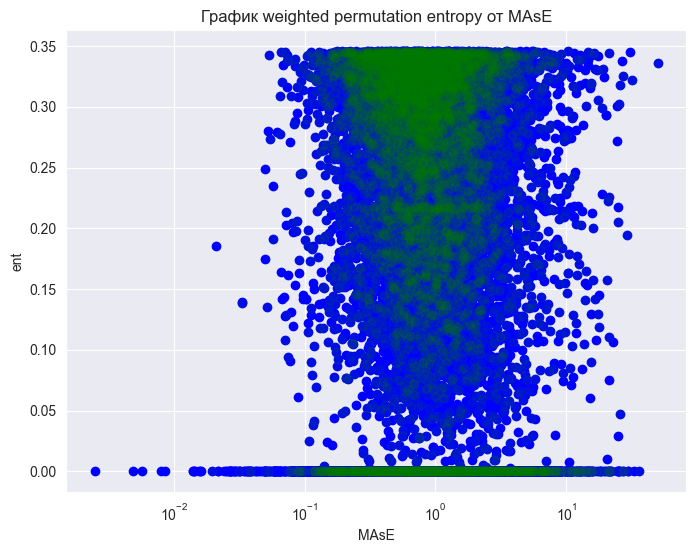

In [16]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['mase'], df_year["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha=0.1)
plt.semilogx()
plt.title('График weighted permutation entropy от MAsE')
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

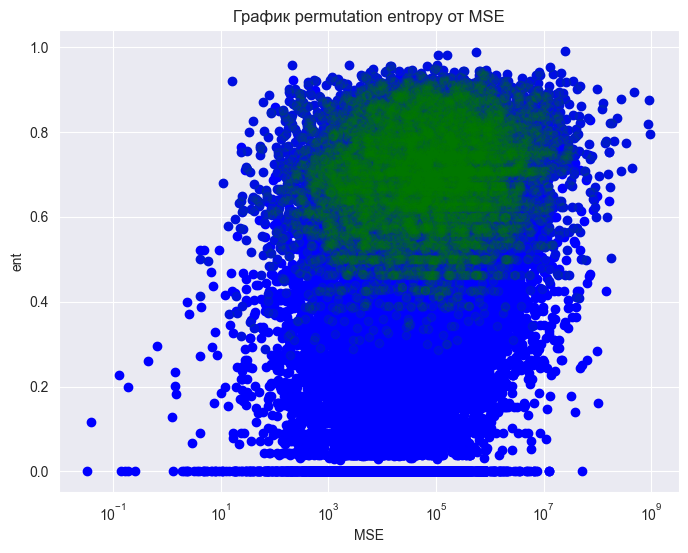

In [18]:
df_year = df_res[df_res['V1'].str.startswith('Y')]
symmetry_ts = df_year.loc[df_year['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_year['mse'], df_year["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.semilogx()
plt.title('График permutation entropy от MSE')
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [20]:
df_mres = df_res[df_res['V1'].str.startswith('M')]

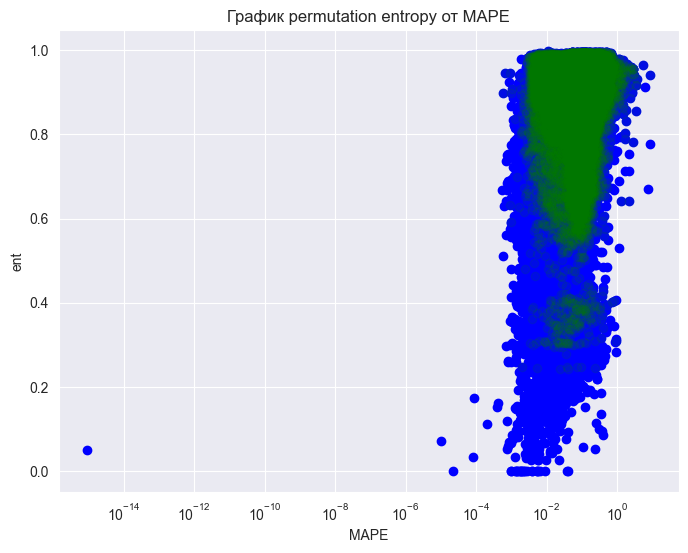

In [21]:
df_sorted = df_mres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

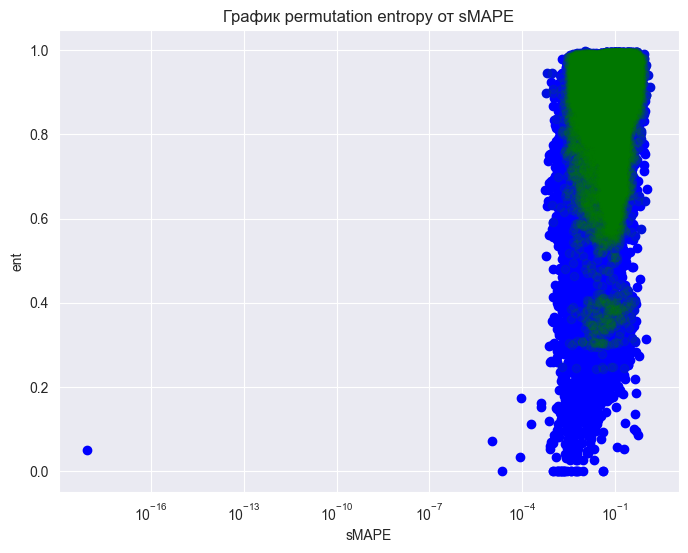

In [22]:
df_sorted = df_mres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['smape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.semilogx()
plt.title('График permutation entropy от sMAPE')
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

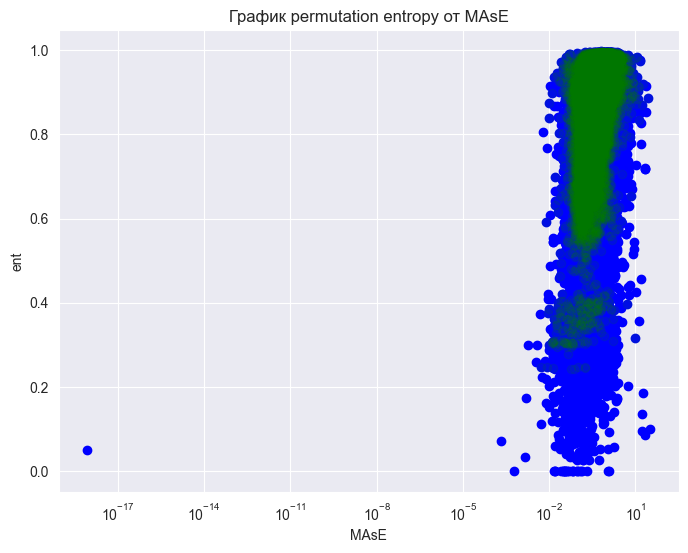

In [23]:
df_sorted = df_mres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mase'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.semilogx()
plt.title('График permutation entropy от MAsE')
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

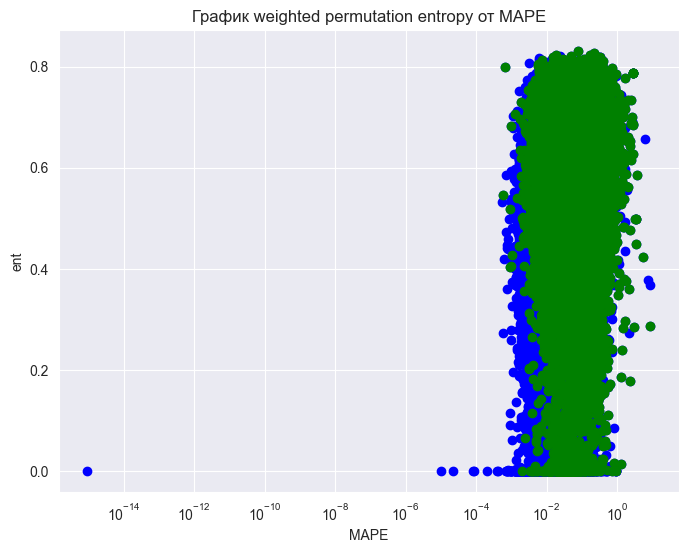

In [11]:
df_month = df_res[df_res['V1'].str.startswith('M')]
symmetry_ts = df_month.loc[df_month['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_month['mape'], df_month["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5)
plt.semilogx()
plt.title('График weighted permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

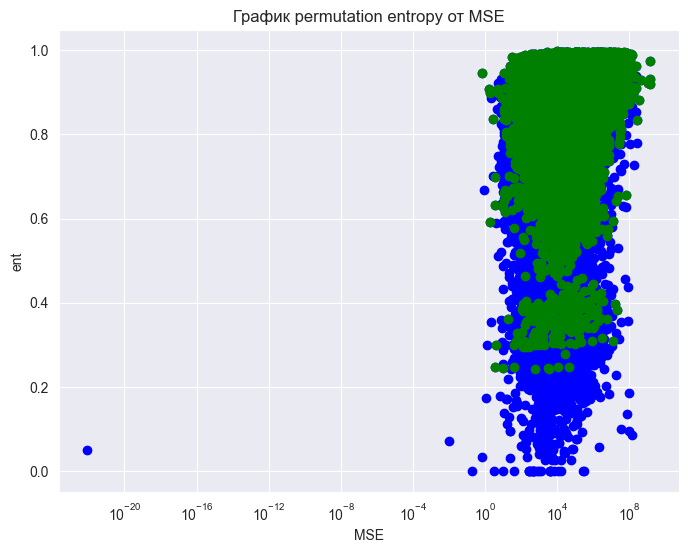

In [12]:
df_month = df_res[df_res['V1'].str.startswith('M')]
symmetry_ts = df_month.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_month['mse'], df_month["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
plt.title('График permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

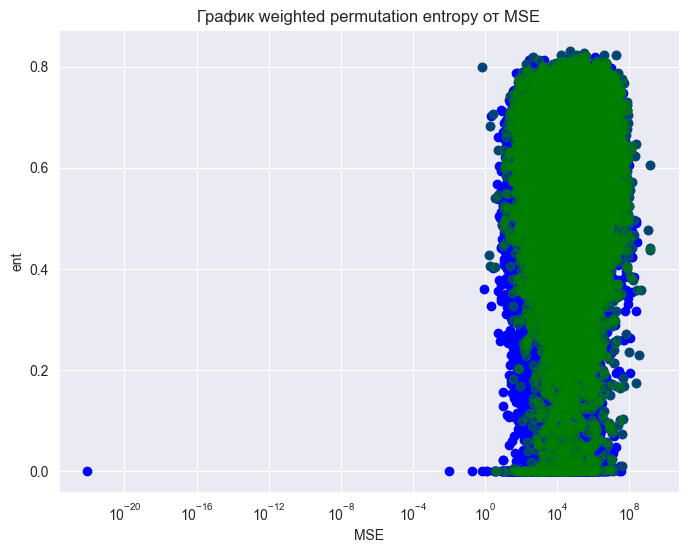

In [15]:
df_month = df_res[df_res['V1'].str.startswith('M')]
symmetry_ts = df_month.loc[df_sorted['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_month['mse'], df_month["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.5)
plt.title('График weighted permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [15]:

df = []
symdf = []
for k in range(5, 101, 5):
    df_sorted = df_mres[df_mres["perm_ent4"] <= k/100]
    df_sorted = df_sorted[df_sorted["perm_ent4"] > (k-5)/100]
    df.append(df_sorted.loc[df_sorted['sym_test'] == False])
    symdf.append(df_sorted.loc[df_sorted['sym_test']])



In [16]:
df[0]

V1  perm_ent4            mse      mape  sym_test
468      M469   0.044899   33306.567136  0.014782     False
2737    M2738   0.033855   11086.651458  0.008895     False
5802    M5803   0.032572      53.303057  0.003548     False
13500  M13501   0.031988   11054.668714  0.007634     False
28039  M28040   0.044215  145175.948466  0.033142     False
28040  M28041   0.044215  720421.164159  0.063141     False
30350  M30351   0.033855   30210.723933  0.014518     False
30395  M30396   0.026397  187504.350610  0.035860     False
30585  M30586   0.026397   15859.451735  0.010263     False
30593  M30594   0.026397  239117.829955  0.041537     False
30724  M30725   0.026397   13346.644835  0.007604     False
37531  M37532   0.048770  256990.793835  0.043455     False
38823  M38824   0.026397   32301.278047  0.017497     False
38996  M38997   0.047049    4166.592503  0.005143     False
39002  M39003   0.033855   30395.573484  0.014186     False
41994  M41995   0.040250   26825.434870  0.023540     False
44249  M44250   0.040431   21383.021180  0.007643     False
47923  M47924   0.042253  113400.623985  0.029867     False

In [37]:
df_sorted.loc[df_sorted['sym_test']].sort_values(by='mape', ascending=False)

V1  perm_ent4           mse      mape  sym_test
128      M129   0.960461  8.186535e+06  6.499126      True
15169  M15170   0.965011  4.372507e+06  5.960623      True
17017  M17018   0.978104  1.051407e+08  5.397747      True
44205  M44206   0.974286  1.273893e+08  4.808400      True
33873  M33874   0.951162  4.922035e+06  4.132663      True
...       ...        ...           ...       ...       ...
14835  M14836   0.985573  2.113122e+03  0.003938      True
24263  M24264   0.975236  1.504591e+03  0.003811      True
24698  M24699   0.976202  8.400357e+02  0.003748      True
24144  M24145   0.955569  1.031103e+03  0.003424      True
25515  M25516   0.981272  1.006202e+03  0.003222      True

[8630 rows x 5 columns]

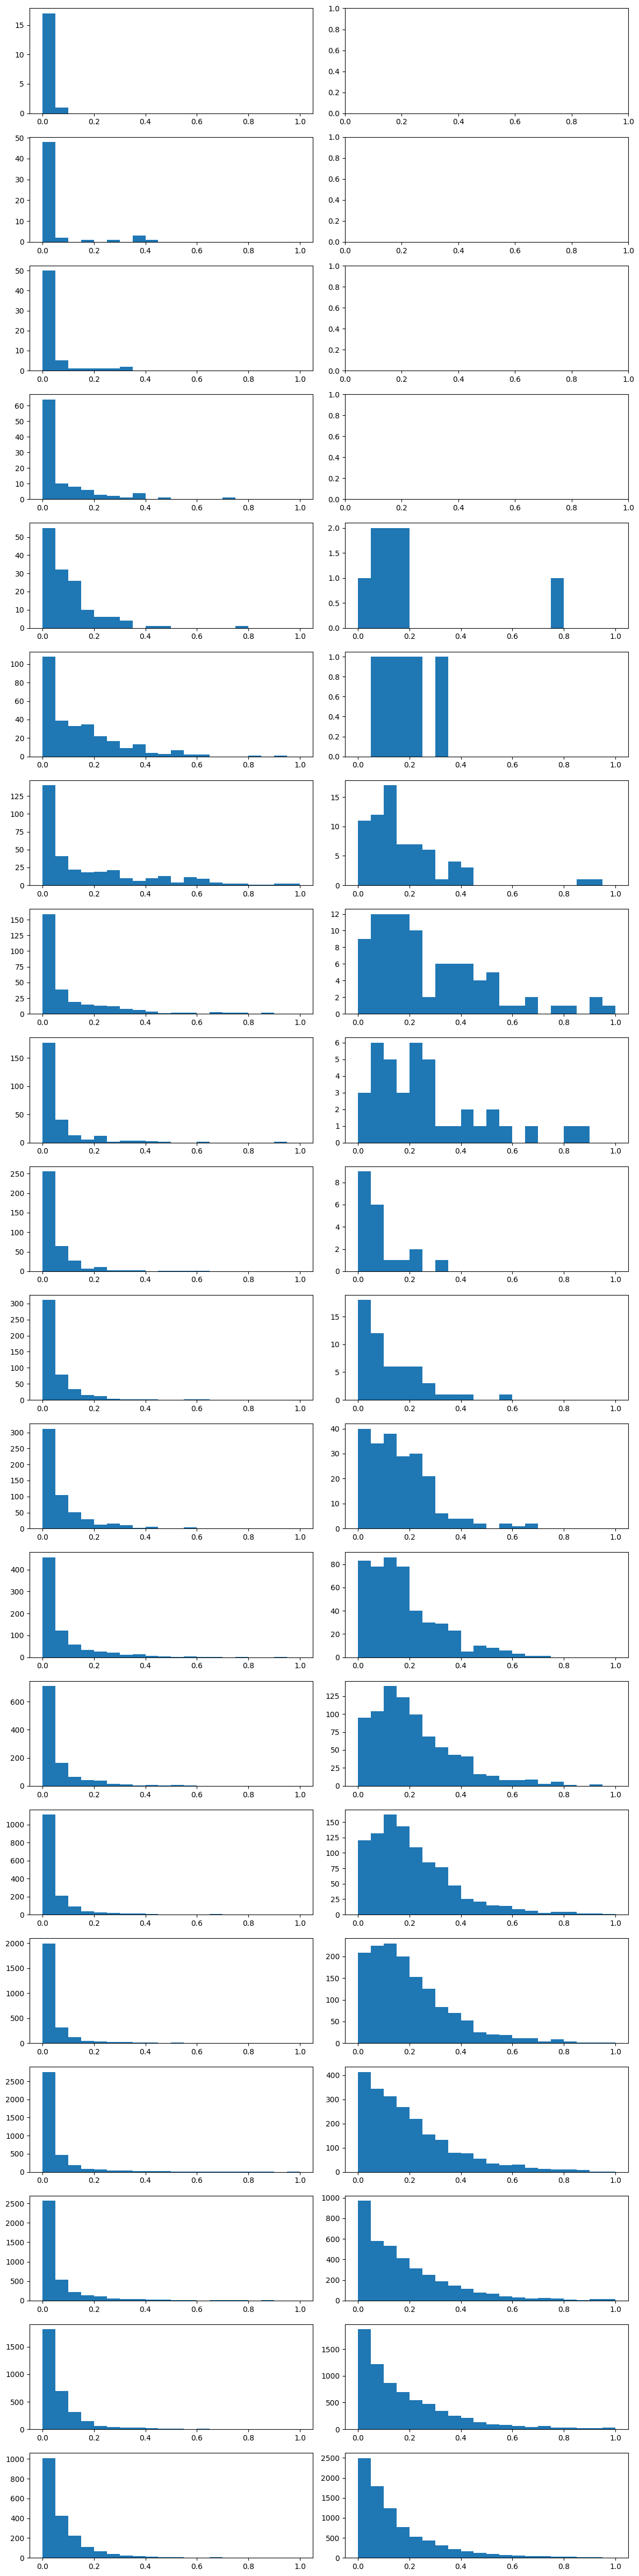

In [27]:
fig, axs = plt.subplots(20, 2, figsize=(12, 48))
for i in range(20):
    if not df[i].empty:
        axs[i, 0].hist(df[i]["mape"], bins = 20, range =(0, 1))
    if not symdf[i].empty:
        axs[i, 1].hist(symdf[i]["mape"], bins = 20, range = (0, 1))

plt.tight_layout()
plt.show()

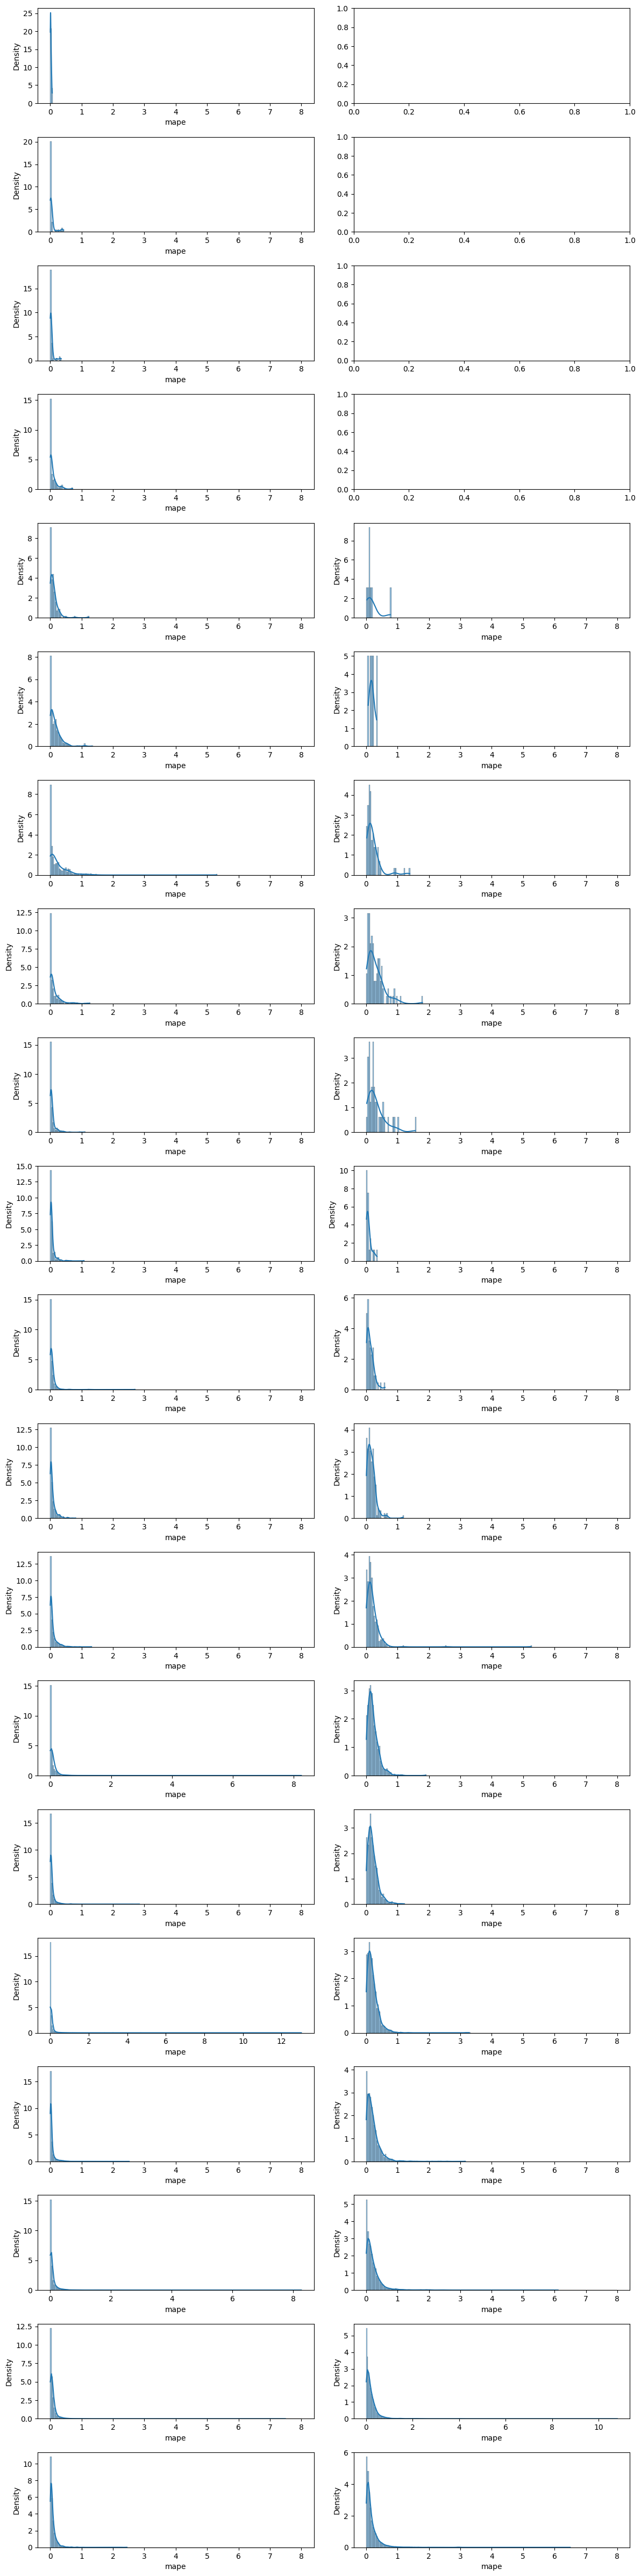

In [40]:
fig, axes = plt.subplots(20, 2, figsize=(12, 48))
for i in range(20):
    if not df[i].empty:
        sns.histplot(
        x=df[i]["mape"],
        ax=axes[i, 0],
        bins = 200,
        kde=True,
        stat="density",
        binrange=(0,8)
        )
    if not symdf[i].empty:
        sns.histplot(
        x=symdf[i]["mape"],
        ax=axes[i, 1],
        bins = 200,
        kde=True,
        stat="density",
        binrange=(0,8)
        )
fig.tight_layout(pad=1.0)
plt.show()

In [16]:
df_hres = df_res[df_res['V1'].str.startswith('H')]
df_hres

V1  perm_ent3  perm_ent4            mse      mape  sym_test  \
0      H1        NaN   0.510222     435.638017  0.023878      True   
1      H2        NaN   0.504348   11210.650160  0.036895      True   
2      H3        NaN   0.565525    6855.813571  0.049501      True   
3      H4        NaN   0.454969  118531.178309  0.042077      True   
4      H5        NaN   0.475852   25858.302614  0.049814     False   
..    ...        ...        ...            ...       ...       ...   
409  H410        NaN   0.874486     352.123379  0.120214     False   
410  H411        NaN   0.858007     150.274132  0.109809     False   
411  H412        NaN   0.838310      96.873631  0.132345      True   
412  H413        NaN   0.911229      82.427785  0.150806      True   
413  H414        NaN   0.791907     101.512993  0.119077      True   

     w_perm_ent4  
0       0.232070  
1       0.258705  
2       0.252334  
3       0.274060  
4       0.254518  
..           ...  
409     0.661609  
410     0.561727  
411     0.583766  
412     0.544162  
413     0.712732  

[414 rows x 7 columns]

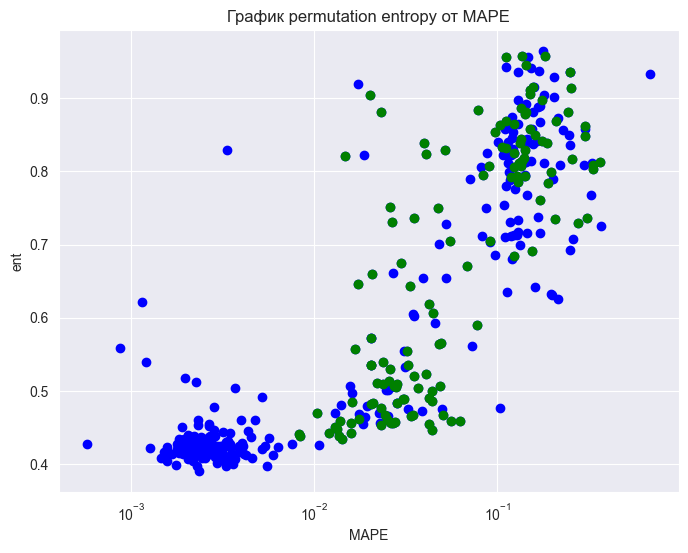

In [17]:
df_sorted = df_hres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5)
#plt.scatter(df_sorted['mape'], df_sorted["perm_ent3"], color='green')
plt.semilogx()
plt.title('График permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

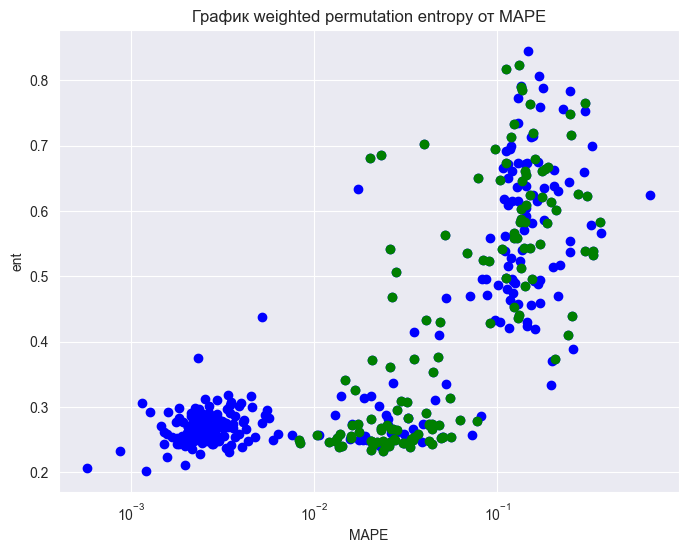

In [19]:
df_sorted = df_hres.sort_values(by='mape', ascending=False)
symmetry_ts = df_sorted.loc[df_sorted['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['mape'], df_sorted["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mape'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5)
plt.semilogx()
plt.title('График weighted permutation entropy от MAPE')
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

Посмотрим на временные ряды с большой энтропией и малым MAPE

In [29]:
df_mobs = df_mres[df_mres["perm_ent4"] > 0.95].sort_values(by="mape", ascending=True)
df_mobs

V1  perm_ent3  perm_ent4           mse      mape  sym_test  \
25727  M25728        NaN   0.980173  2.848776e+02  0.001894     False   
24403  M24404        NaN   0.978979  5.786207e+01  0.002577     False   
25470  M25471        NaN   0.957954  3.659508e+02  0.002581     False   
25715  M25716        NaN   0.973406  3.843356e+02  0.002677     False   
4936    M4937        NaN   0.960628  1.288954e+03  0.002681     False   
...       ...        ...        ...           ...       ...       ...   
34205  M34206        NaN   0.956086  2.287118e+06  2.811096      True   
34257  M34258        NaN   0.954437  6.890356e+06  2.829130      True   
33465  M33466        NaN   0.955487  7.020620e+06  2.833328      True   
34211  M34212        NaN   0.956118  2.260142e+06  2.875568      True   
15169  M15170        NaN   0.965011  3.538183e+06  5.428174      True   

       w_perm_ent4  
25727     0.592443  
24403     0.727487  
25470     0.550831  
25715     0.633742  
4936      0.694178  
...            ...  
34205     0.786833  
34257     0.786680  
33465     0.786680  
34211     0.786833  
15169     0.424036  

[10585 rows x 7 columns]

In [30]:
symmetry_ts = df_mobs.loc[df_mobs["sym_test"]]

Mean:0.116 
Interquartile range:[0.03, 0.145]
95%:[0.007, 0.476]


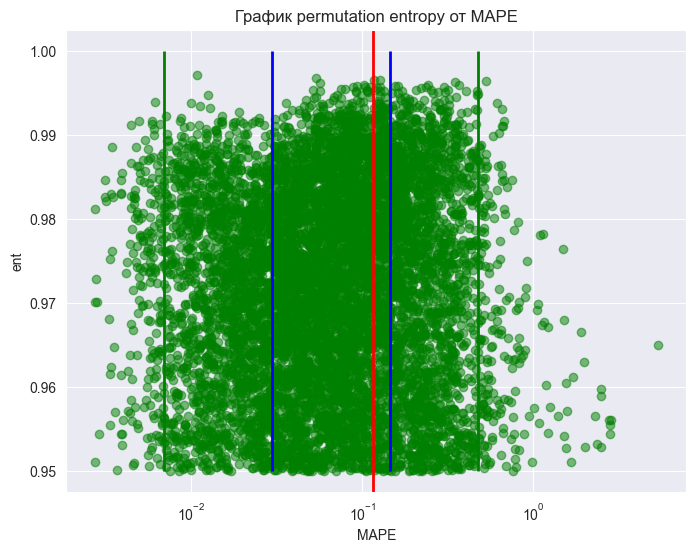

In [22]:
mean = np.mean(symmetry_ts['mape'])
q1 = np.percentile(symmetry_ts['mape'], 25)
q3 = np.percentile(symmetry_ts['mape'], 75)
ci_low, ci_high = np.percentile(symmetry_ts['mape'], [2.5, 97.5])

plt.figure(figsize=(8, 6))

plt.scatter(symmetry_ts['mape'], symmetry_ts['perm_ent4'], color='green', alpha=0.5)
plt.axvline(mean, color='r', linestyle='-', linewidth=2, label='Среднее')
plt.vlines([q1, q3], ymin=0.95, ymax=1, color='b', linewidth=2, label='Квартили')
plt.vlines([ci_low, ci_high], ymin=0.95, ymax=1, color='g', linewidth=2, label='95% Интервал')

plt.title('График permutation entropy от MAPE')
plt.semilogx()
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
print(f"Mean:{round(mean,3)} \nInterquartile range:[{round(q1,3)}, {round(q3,3)}]\n95%:[{round(ci_low,3)}, {round(ci_high,3)}]")
plt.show()


In [23]:
symmetry_ts.shape

(8630, 7)

In [24]:
df_mobs.shape

(10585, 7)

In [25]:
not_sim_df = df_mobs.loc[df_mobs['sym_test'] == False]

Mean:0.055 
Interquartile range:[0.014, 0.068]
95%:[0.005, 0.24]


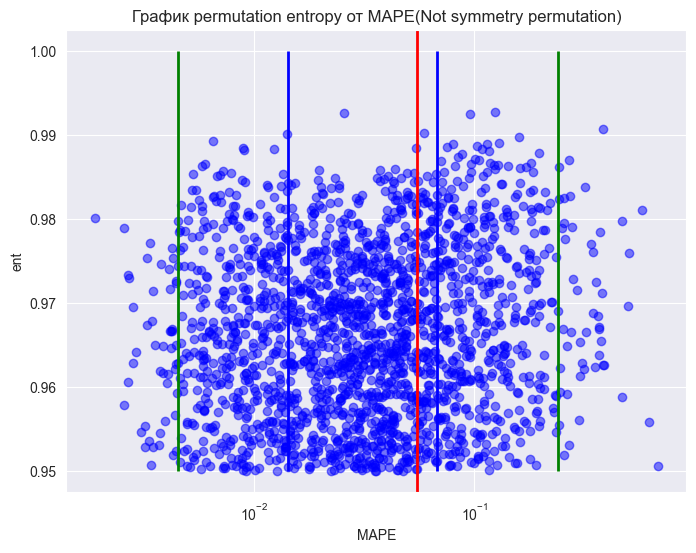

In [26]:
mean = np.mean(not_sim_df['mape'])
q1 = np.percentile(not_sim_df['mape'], 25)
q3 = np.percentile(not_sim_df['mape'], 75)
ci_low, ci_high = np.percentile(not_sim_df['mape'], [2.5, 97.5])

plt.figure(figsize=(8, 6))

plt.scatter(not_sim_df['mape'], not_sim_df['perm_ent4'], color='blue', alpha=0.5)
plt.axvline(mean, color='r', linestyle='-', linewidth=2, label='Среднее')
plt.vlines([q1, q3], ymin=0.95, ymax=1, color='b', linewidth=2, label='Квартили')
plt.vlines([ci_low, ci_high], ymin=0.95, ymax=1, color='g', linewidth=2, label='95% Интервал')

plt.title('График permutation entropy от MAPE(Not symmetry permutation)')
plt.semilogx()
plt.xlabel('MAPE')
plt.ylabel('ent')
plt.grid(True)
print(f"Mean:{round(mean,3)} \nInterquartile range:[{round(q1,3)}, {round(q3,3)}]\n95%:[{round(ci_low,3)}, {round(ci_high,3)}]")
plt.show()

In [27]:
input_file = "../src/M4-methods/Dataset/Train/Monthly-train.csv"
with open(input_file, 'r') as file:
    # Убираем кавычки из каждой строки
    lines = [line.replace('"', '') for line in file]

st = "".join(lines)
output_file = "output.csv"
f = open(output_file, "w")
f.write(st)
f.close()
df_m = pd.read_csv(output_file, index_col=0)
df_m

V2      V3      V4      V5      V6      V7      V8      V9  \
V1                                                                       
M1      8000.0  8350.0  8570.0  7700.0  7080.0  6520.0  6070.0  6650.0   
M2      2440.0  2490.0  2710.0  2290.0  1960.0  1990.0  1960.0  2530.0   
M3      2670.0  2590.0  2784.0  2816.0  2888.0  2906.0  2839.0  2860.0   
M4      7264.0  7215.0  7022.0  7040.0  6966.0  6984.0  7025.0  7082.0   
M5      4210.0  4290.0  4250.0  4320.0  4320.0  4330.0  4320.0  4260.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
M47996  9964.0  7212.0  7858.0  8493.0  8203.0  8362.0  7238.0  7357.0   
M47997  1696.6  1627.2  1465.4  1672.8  1760.1  1974.8  1733.7  1898.0   
M47998  5900.0  6000.0  6280.0  6100.0  5410.0  5320.0  5130.0  5330.0   
M47999  4660.0  4980.0  5060.0  5090.0  4790.0  4840.0  4640.0  4770.0   
M48000  6070.0  6150.0  6350.0  6130.0  5560.0  5340.0  5320.0  5500.0   

           V10     V11  ...  V2786  V2787  V2788  V2789  V2790  V2791  V2792  \
V1                      ...                                                    
M1      6830.0  5710.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M2      2640.0  2650.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M3      2798.0  2795.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M4      6956.0  7014.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M5      4220.0  4260.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...        ...     ...  ...    ...    ...    ...    ...    ...    ...    ...   
M47996  8642.0  8833.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M47997  1952.4  1684.6  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M47998  5810.0  5840.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M47999  4940.0  4840.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
M48000  5840.0  5810.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        V2793  V2794  V2795  
V1                           
M1        NaN    NaN    NaN  
M2        NaN    NaN    NaN  
M3        NaN    NaN    NaN  
M4        NaN    NaN    NaN  
M5        NaN    NaN    NaN  
...       ...    ...    ...  
M47996    NaN    NaN    NaN  
M47997    NaN    NaN    NaN  
M47998    NaN    NaN    NaN  
M47999    NaN    NaN    NaN  
M48000    NaN    NaN    NaN  

[48000 rows x 2794 columns]

In [31]:
df_m.loc[symmetry_ts["V1"]]

V2           V3            V4           V5           V6  \
V1                                                                         
M37894  8852.000000  8922.000000   8927.000000  8890.000000  8924.000000   
M21664  6953.843262  7039.954688   7071.148598  7056.424398  7045.522554   
M25516  6825.011870  6880.940560   6877.266040  6869.415210  6842.886590   
M25764  6421.690100  6468.833650   6477.834140  6461.315850  6446.182070   
M23419  9440.000000  9446.000000  10096.000000  9587.000000  9565.000000   
...             ...          ...           ...          ...          ...   
M34206  4008.510000  3494.880000   4105.090000  3228.210000  3378.230000   
M34258  6925.118000  6080.340000   6401.360000  4107.118000  6565.510000   
M33466  7029.768000  6129.010000   7199.142000  5661.348000  5924.439000   
M34212  3957.210000  3474.480000   3657.920000  2333.590000  3751.720000   
M15170  1179.500000  1530.300000   1648.400000  1565.600000  1667.200000   

                 V7           V8           V9          V10         V11  ...  \
V1                                                                      ...   
M37894  8948.000000  9009.000000  9018.000000  9013.000000  8983.00000  ...   
M21664  7053.213567  7049.459529  7069.456818  7093.222799  7086.89589  ...   
M25516  6844.838440  6823.982470  6825.387700  6833.007050  6818.63650  ...   
M25764  6446.142080  6406.961750  6419.692270  6434.101200  6413.49284  ...   
M23419  9764.000000  9877.000000  9853.000000  9528.000000  9764.00000  ...   
...             ...          ...          ...          ...         ...  ...   
M34206  3815.510000  4108.670000  4102.760000  3198.480000  2313.25000  ...   
M34258  6348.355000  6843.218000  5815.933000  5899.950000  6948.90200  ...   
M33466  6691.302000  7205.420000  7195.056000  5609.210000  4056.77200  ...   
M34212  3607.020000  3910.410000  3323.390000  3371.400000  3948.24000  ...   
M15170  1699.800000  1284.000000  1572.800000  1504.200000  1939.50000  ...   

        V2786  V2787  V2788  V2789  V2790  V2791  V2792  V2793  V2794  V2795  
V1                                                                            
M37894    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M21664    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M25516    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M25764    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M23419    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
M34206    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M34258    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M33466    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M34212    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
M15170    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[8630 rows x 2794 columns]

In [32]:
ts = df_m.loc[not_sim_df["V1"].iloc[0]]
ts

V2       2799.0
V3       5178.0
V4       2914.0
V5       2856.0
V6       2040.0
          ...  
V2791       NaN
V2792       NaN
V2793       NaN
V2794       NaN
V2795       NaN
Name: M42881, Length: 2794, dtype: float64

<Axes: >

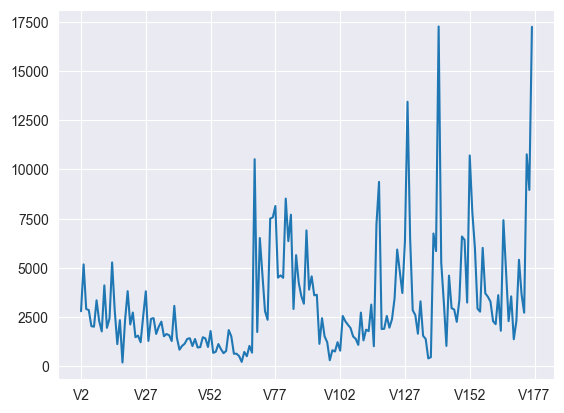

In [33]:
ts.plot()

<BarContainer object of 24 artists>

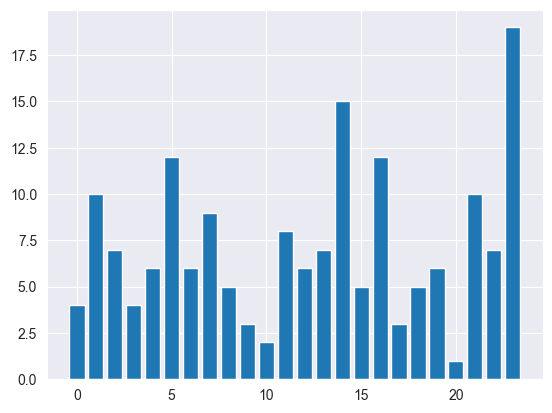

In [34]:
perm = count_permutation(ts.dropna(), 4)
plt.bar(range(len(perm)),perm)

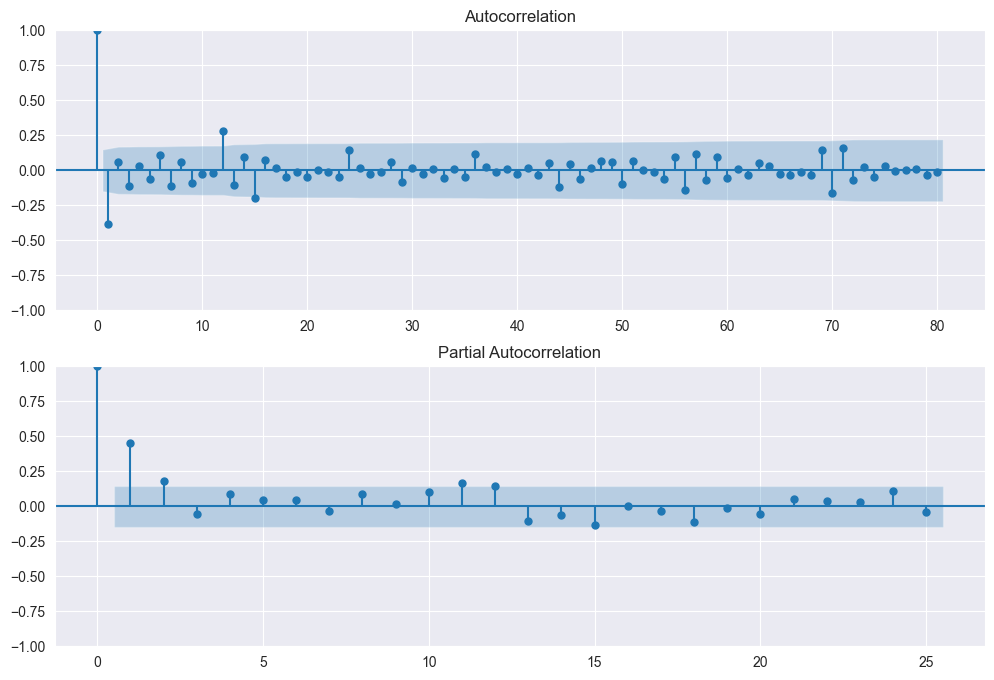

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts.diff(periods = 1).dropna().values, lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts.dropna(), lags=25, ax=ax2)

In [36]:
model = sm.tsa.statespace.SARIMAX(endog=ts.dropna().values,order=(2,1,1),seasonal_order=(0,0,1,12))
res = model.fit()
print(res.summary())

C:\Users\vitya\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vitya\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  175
Model:             SARIMAX(2, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -1596.857
Date:                            Sat, 24 Feb 2024   AIC                           3203.714
Time:                                    21:57:55   BIC                           3219.510
Sample:                                         0   HQIC                          3210.122
                                            - 175                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3802      0.094      4.063      0.000       0.197       0.564
ar.L2          0.2045      0.087   

In [39]:
y_test = pd.read_csv("../src/M4-methods/Dataset/Test/Monthly-test.csv", index_col=0)
print("SARIMA: ",mean_absolute_percentage_error(y_test.loc[df_mobs["V1"].iloc[0]], res.predict(450,467, dynamic=True)))
print("Method: ", symmetry_ts['mape'].iloc[0])

SARIMA:  0.09248594342674495
Method:  0.0027075965183985


C:\Users\vitya\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

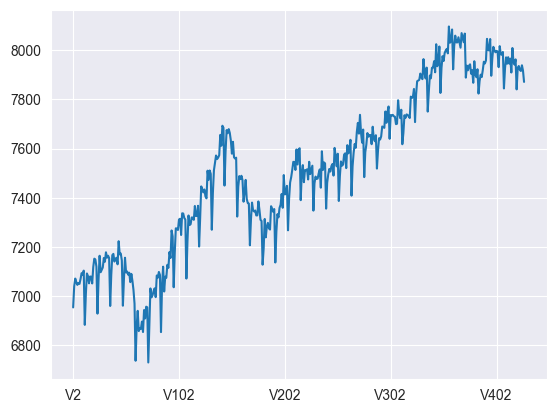

In [41]:
df_m.loc[symmetry_ts["V1"].iloc[1]].plot()

<BarContainer object of 24 artists>

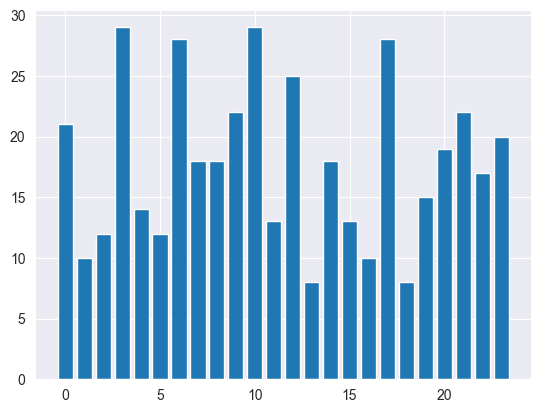

In [42]:
perm = count_permutation(df_m.loc[df_mobs["V1"].iloc[1]].dropna(), 4)
plt.bar(range(len(perm)),perm)

<Axes: >

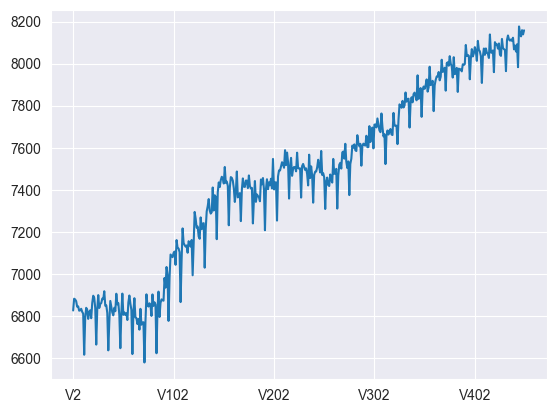

In [44]:
df_m.loc[symmetry_ts["V1"].iloc[2]].plot()

<BarContainer object of 24 artists>

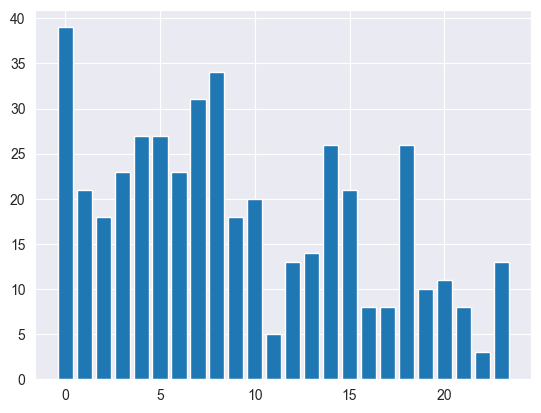

In [45]:
perm = count_permutation(df_m.loc[df_mobs["V1"].iloc[2]].dropna(), 4)
plt.bar(range(len(perm)),perm)

In [115]:
symmetry_ts

V1  perm_ent4           mse      mape  sym_test
25515  M25516   0.981272  1.006202e+03  0.003222      True
24144  M24145   0.955569  1.031103e+03  0.003424      True
24698  M24699   0.976202  8.400357e+02  0.003748      True
24263  M24264   0.975236  1.504591e+03  0.003811      True
14835  M14836   0.985573  2.113122e+03  0.003938      True
...       ...        ...           ...       ...       ...
33873  M33874   0.951162  4.922035e+06  4.132663      True
44205  M44206   0.974286  1.273893e+08  4.808400      True
17017  M17018   0.978104  1.051407e+08  5.397747      True
15169  M15170   0.965011  4.372507e+06  5.960623      True
128      M129   0.960461  8.186535e+06  6.499126      True

[8630 rows x 5 columns]

In [46]:
ts_sym = df_m.loc[symmetry_ts["V1"].iloc[3]]
ts_sym

V2       6421.69010
V3       6468.83365
V4       6477.83414
V5       6461.31585
V6       6446.18207
            ...    
V2791           NaN
V2792           NaN
V2793           NaN
V2794           NaN
V2795           NaN
Name: M25764, Length: 2794, dtype: float64

<Axes: >

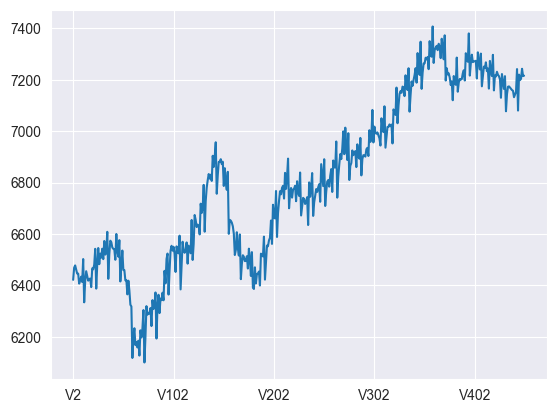

In [47]:
ts_sym.plot()

<BarContainer object of 24 artists>

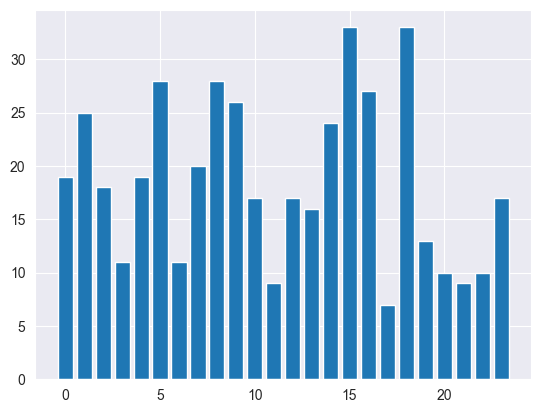

In [48]:
perm = count_permutation(ts_sym.dropna(), 4)
plt.bar(range(len(perm)),perm)

In [49]:
multiply_equals_test(perm, alpha=0.03)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([0.99496831, 0.1103087 , 0.59366634, 0.99496831, 0.94804502,
        0.98567659, 0.94804502, 0.94804502, 0.98567659, 0.99496831,
        0.99496831, 0.69280358]),
 0.002535048613836688,
 0.0025)

Узнали, что и Арима хорошо предсказывает эти ряды. Они в основном сезонные и трендовые. Почему-то "симметричное распределение" не сильно симметрично

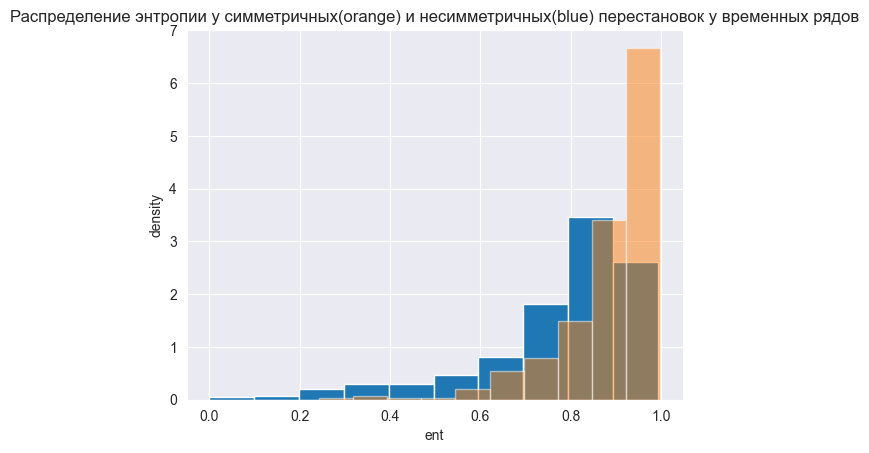

In [50]:
plt.hist(df_mres[df_mres["sym_test"] == False]["perm_ent4"], density=True)
plt.hist(df_mres[df_mres["sym_test"]]["perm_ent4"], density=True, alpha = 0.5)
plt.title('Распределение энтропии у симметричных(orange) и несимметричных(blue) перестановок у временных рядов')
plt.xlabel('ent')
plt.ylabel('density')
plt.grid(True)
plt.show()

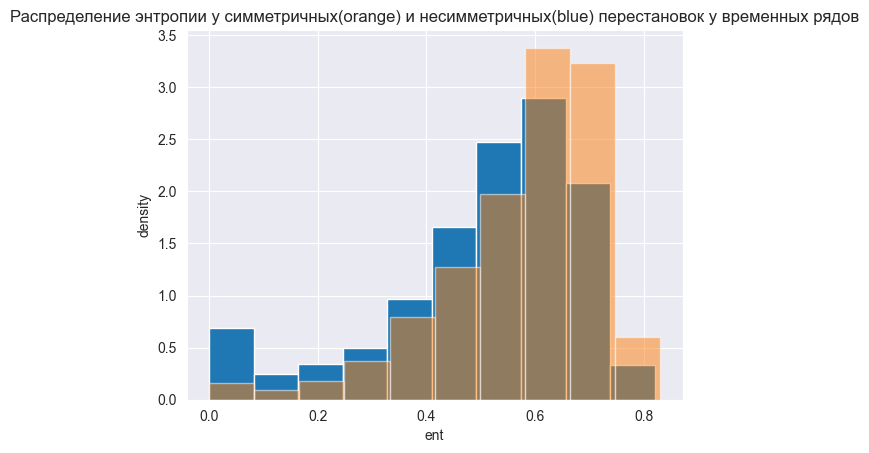

In [51]:
plt.hist(df_mres[df_mres["sym_test"] == False]["w_perm_ent4"], density=True)
plt.hist(df_mres[df_mres["sym_test"]]["w_perm_ent4"], density=True, alpha = 0.5)
plt.title('Распределение энтропии у симметричных(orange) и несимметричных(blue) перестановок у временных рядов')
plt.xlabel('ent')
plt.ylabel('density')
plt.grid(True)
plt.show()

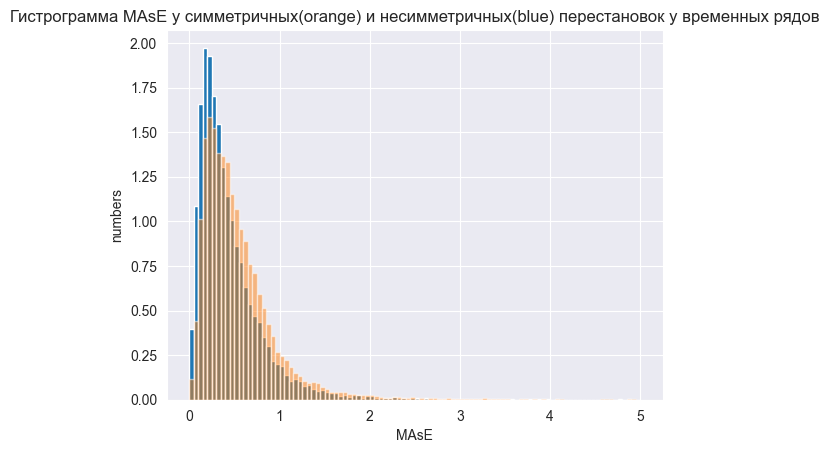

In [31]:
plt.hist(df_mres[df_mres["sym_test"] == False]["mase"], bins= 100,density=True, range=(0,5))
plt.hist(df_mres[df_mres["sym_test"]]["mase"],bins = 100, alpha = 0.5, density=True, range=(0,5))
plt.title('Гистрограмма MAsE у симметричных(orange) и несимметричных(blue) перестановок у временных рядов')
plt.xlabel('MAsE')
plt.ylabel('numbers')
plt.grid(True)
plt.show()

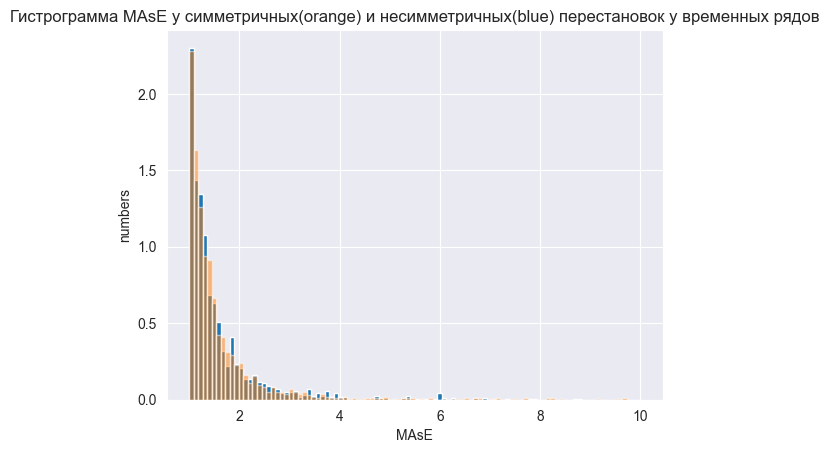

In [32]:
plt.hist(df_mres[df_mres["sym_test"] == False]["mase"], bins= 100,density=True, range=(1,10))
plt.hist(df_mres[df_mres["sym_test"]]["mase"],bins = 100, alpha = 0.5, density=True, range=(1,10))
plt.title('Гистрограмма MAsE у симметричных(orange) и несимметричных(blue) перестановок у временных рядов')
plt.xlabel('MAsE')
plt.ylabel('numbers')
plt.grid(True)
plt.show()

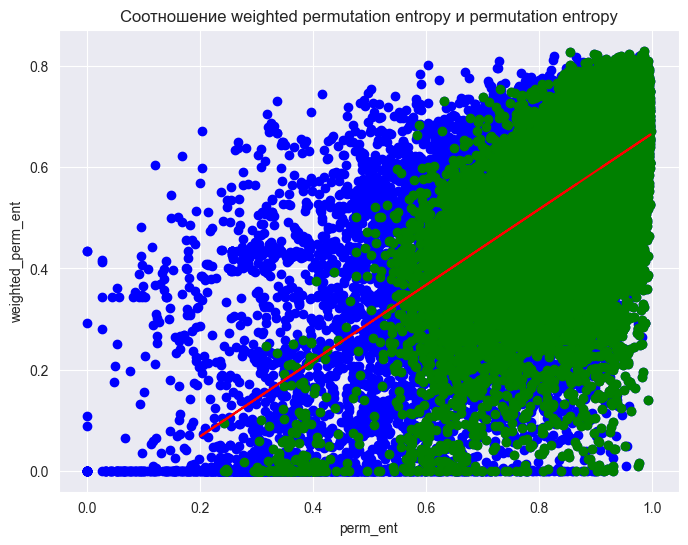

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(df_mres['perm_ent4'], df_mres["w_perm_ent4"], color='blue')
slope, intercept = np.polyfit(x = df_mres['perm_ent4'], y = df_mres["w_perm_ent4"], deg= 1)
plt.plot(df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'], slope*df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'] + intercept, color='red', label='Корреляционная прямая')
plt.scatter(df_mres.loc[df_mres["sym_test"]]['perm_ent4'], df_mres.loc[df_mres["sym_test"]]["w_perm_ent4"], color='green')
plt.title('Соотношение weighted permutation entropy и permutation entropy')
plt.xlabel('perm_ent')
plt.ylabel('weighted_perm_ent')
plt.grid(True)
plt.show()

Нет такой корреляции между большой весовой энтропией и симметричностью, как в обычной энтропии перестановок. Это же мы наблюдаем, сравнивая две энтропии: симметричные временные ряды могут иметь высокую обычную энтропию, но маленькую весовую.

Посмотрим как много несимметричных рядов имеют такие же значения энтропий.

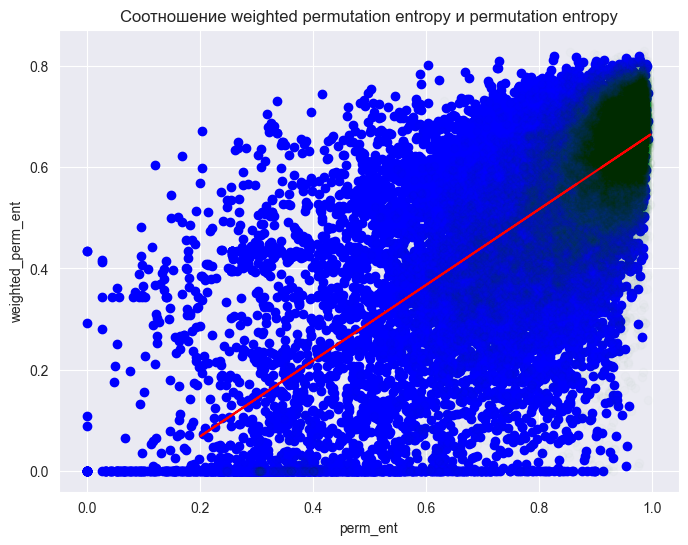

In [24]:
plt.figure(figsize=(8, 6))
slope, intercept = np.polyfit(x = df_mres['perm_ent4'], y = df_mres["w_perm_ent4"], deg= 1)
plt.plot(df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'], slope*df_mres[df_mres['perm_ent4']>0.2]['perm_ent4'] + intercept, color='red', label='Корреляционная прямая')
plt.scatter(df_mres.loc[df_mres["sym_test"] == False]['perm_ent4'], df_mres.loc[df_mres["sym_test"]==False]["w_perm_ent4"], color='blue')
plt.scatter(df_mres.loc[df_mres["sym_test"] == True]['perm_ent4'], df_mres.loc[df_mres["sym_test"]==True]["w_perm_ent4"], color='green', alpha=0.01)
plt.title('Соотношение weighted permutation entropy и permutation entropy')
plt.xlabel('perm_ent')
plt.ylabel('weighted_perm_ent')
plt.grid(True)
plt.show()

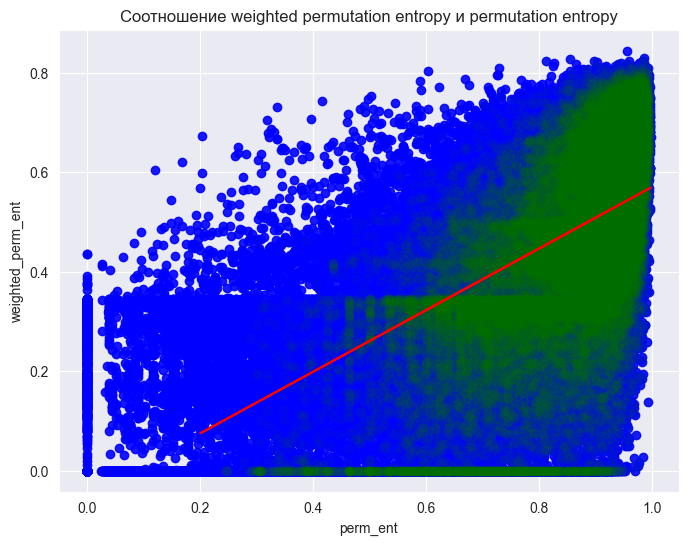

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(df_res['perm_ent4'], df_res["w_perm_ent4"], color='blue', alpha=0.9)
slope, intercept = np.polyfit(x = df_res['perm_ent4'], y = df_res["w_perm_ent4"], deg= 1)
plt.plot(df_res[df_res['perm_ent4']>0.2]['perm_ent4'], slope*df_res[df_res['perm_ent4']>0.2]['perm_ent4'] + intercept, color='red', label='Корреляционная прямая')
plt.scatter(df_res.loc[df_res["sym_test"]]['perm_ent4'], df_res.loc[df_res["sym_test"]]["w_perm_ent4"], color='green', alpha= 0.05)
plt.title('Соотношение weighted permutation entropy и permutation entropy')
plt.xlabel('perm_ent')
plt.ylabel('weighted_perm_ent')
plt.grid(True)
plt.show()

In [33]:
ts_info = pd.read_csv("../src/M4-methods/Dataset/M4-info.csv")
ts_info

M4id category  Frequency  Horizon      SP    StartingDate
0        Y1    Macro          1        6  Yearly  01-01-79 12:00
1        Y2    Macro          1        6  Yearly  01-01-79 12:00
2        Y3    Macro          1        6  Yearly  01-01-79 12:00
3        Y4    Macro          1        6  Yearly  01-01-79 12:00
4        Y5    Macro          1        6  Yearly  01-01-79 12:00
...     ...      ...        ...      ...     ...             ...
99995  H410    Other         24       48  Hourly  01-01-17 12:00
99996  H411    Other         24       48  Hourly  01-01-17 12:00
99997  H412    Other         24       48  Hourly  01-01-17 12:00
99998  H413    Other         24       48  Hourly  12-06-17 12:00
99999  H414    Other         24       48  Hourly  27-04-17 12:00

[100000 rows x 6 columns]

In [34]:
ts_category = set(ts_info["category"])
ts_category

{'Demographic', 'Finance', 'Industry', 'Macro', 'Micro', 'Other'}

In [35]:
ts_info[ts_info["category"] == "Macro"]["M4id"]

0          Y1
1          Y2
2          Y3
3          Y4
4          Y5
         ... 
95481    D123
95482    D124
95483    D125
95484    D126
95485    D127
Name: M4id, Length: 19402, dtype: object

In [36]:
ts_macro = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Macro"]["M4id"].values)]

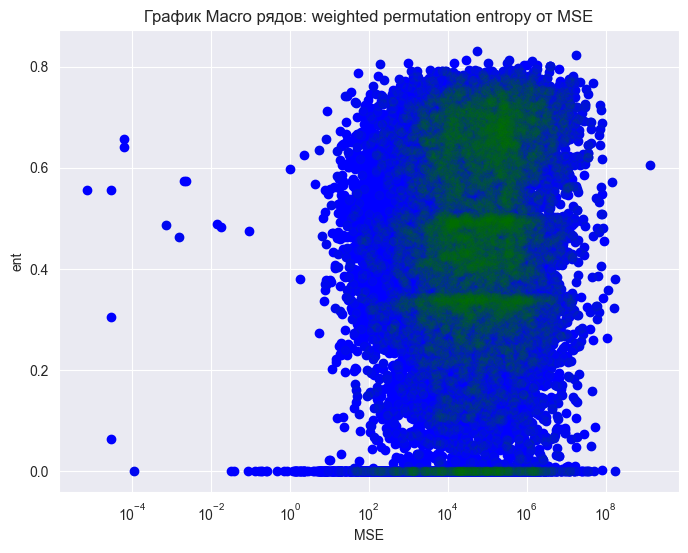

In [93]:
symmetry_ts = ts_macro.loc[ts_macro['sym_test']]

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_macro['mse'], ts_macro["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.title('График Macro рядов: weighted permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

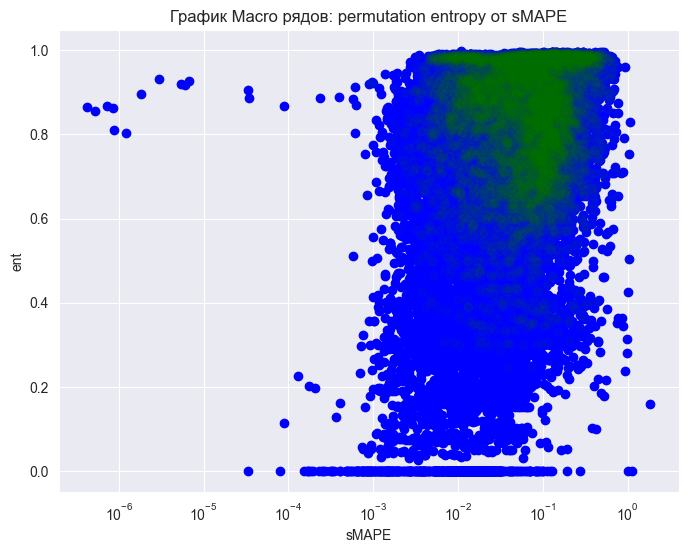

In [95]:
symmetry_ts = ts_macro.loc[ts_macro['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_macro['smape'], ts_macro["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.title('График Macro рядов: permutation entropy от sMAPE')
plt.semilogx()
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

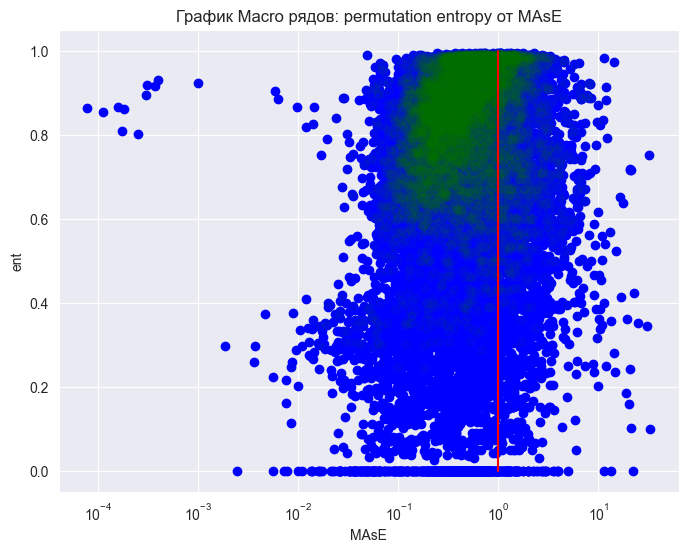

In [48]:
symmetry_ts = ts_macro.loc[ts_macro['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_macro['mase'], ts_macro["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Macro рядов: permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

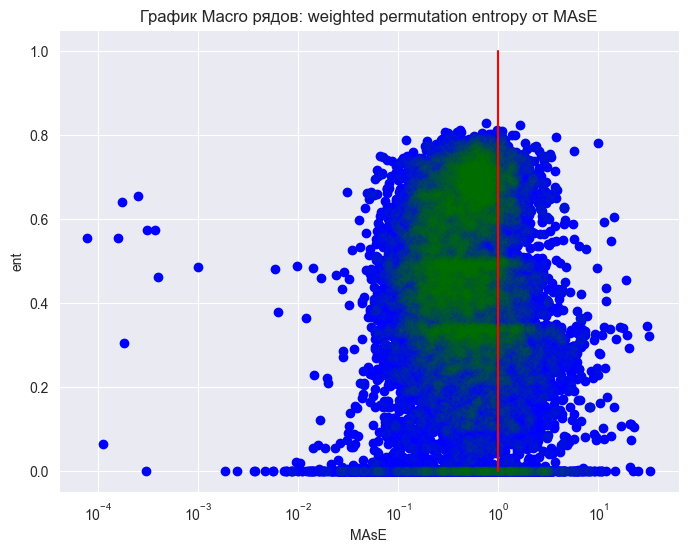

In [55]:
symmetry_ts = ts_macro.loc[ts_macro['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_macro['mase'], ts_macro["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Macro рядов: weighted permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [50]:
ts_demog = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Demographic"]["M4id"].values)]

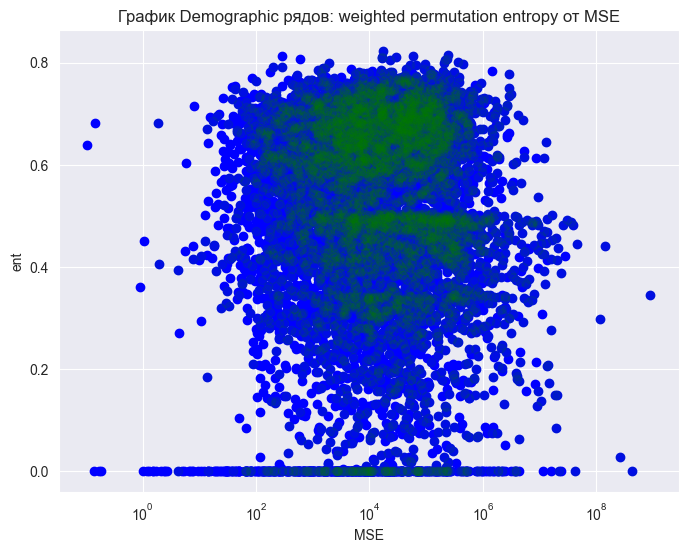

In [52]:
symmetry_ts = ts_demog.loc[ts_demog['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_demog['mse'], ts_demog["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.title('График Demographic рядов: weighted permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

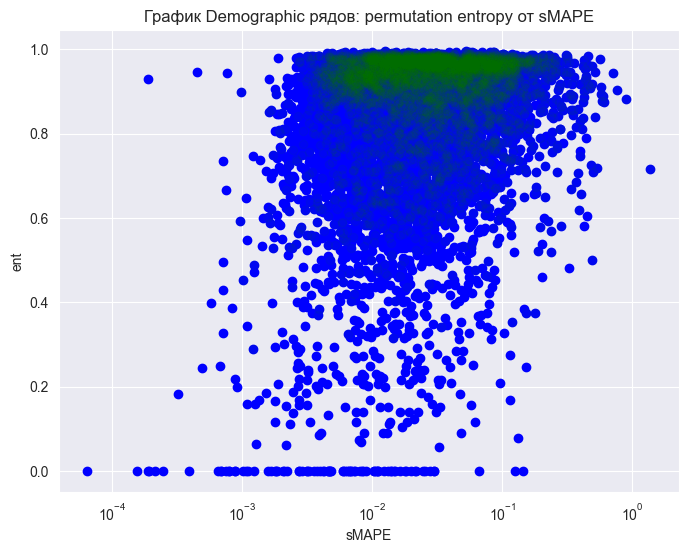

In [53]:
symmetry_ts = ts_demog.loc[ts_demog['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_demog['smape'], ts_demog["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.title('График Demographic рядов: permutation entropy от sMAPE')
plt.semilogx()
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

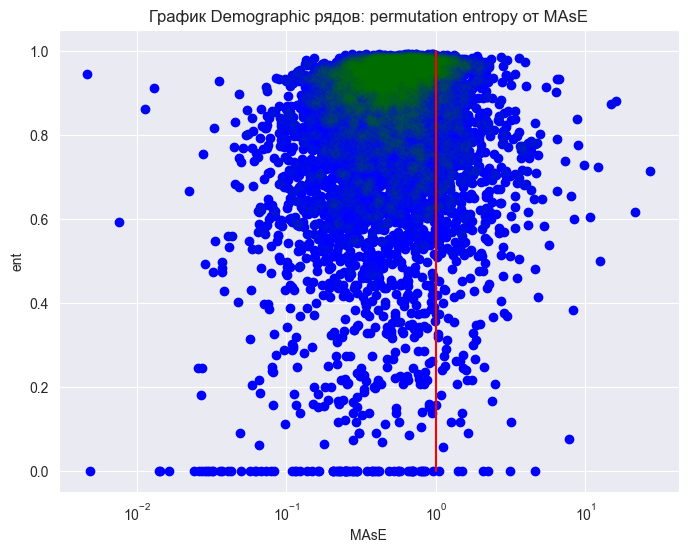

In [54]:
symmetry_ts = ts_demog.loc[ts_demog['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_demog['mase'], ts_demog["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Demographic рядов: permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

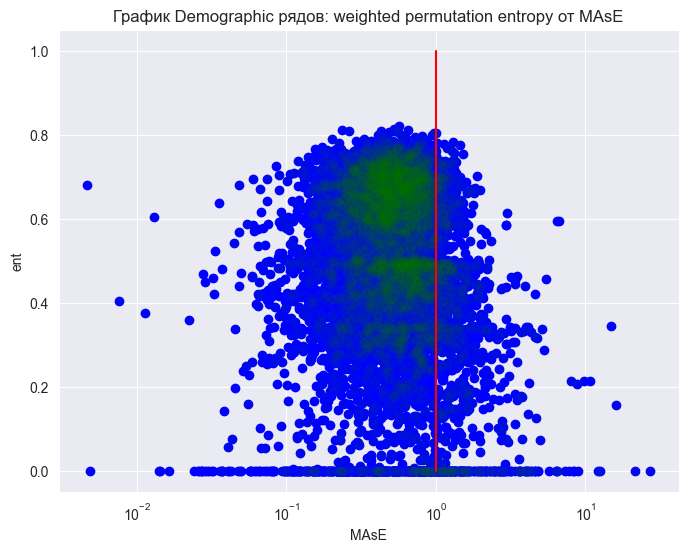

In [56]:
symmetry_ts = ts_demog.loc[ts_demog['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_demog['mase'], ts_demog["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Demographic рядов: weighted permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [57]:
ts_finance = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Finance"]["M4id"].values)]

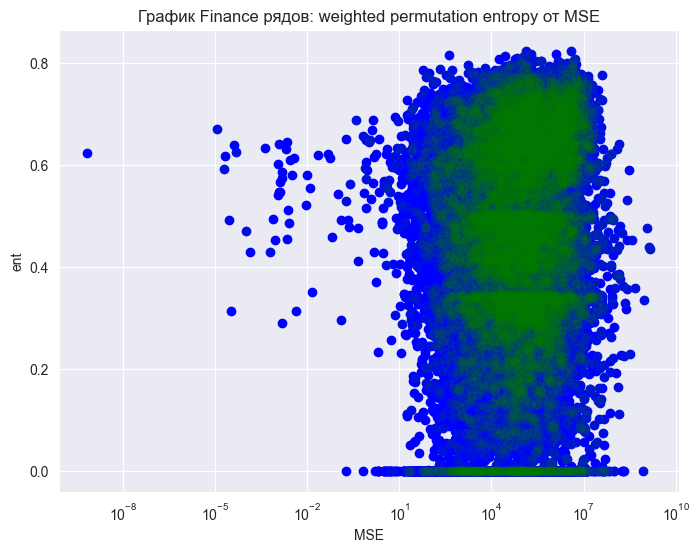

In [58]:
symmetry_ts = ts_finance.loc[ts_finance['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_finance['mse'], ts_finance["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.title('График Finance рядов: weighted permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

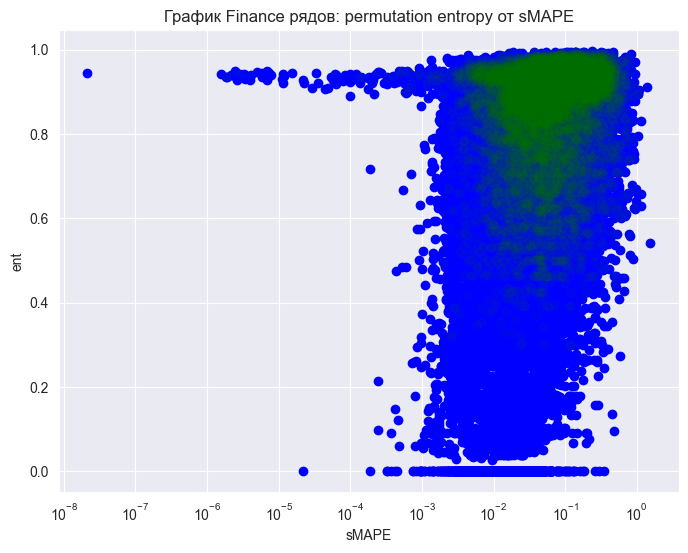

In [59]:
symmetry_ts = ts_finance.loc[ts_finance['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_finance['smape'], ts_finance["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.title('График Finance рядов: permutation entropy от sMAPE')
plt.semilogx()
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

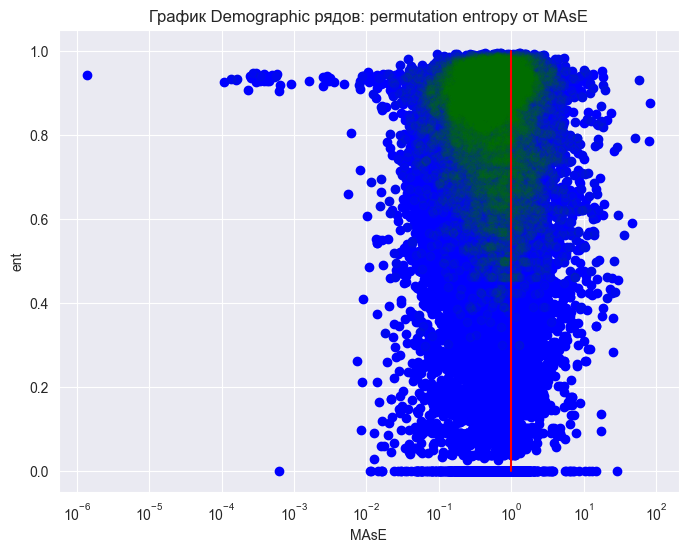

In [60]:
symmetry_ts = ts_finance.loc[ts_finance['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_finance['mase'], ts_finance["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Demographic рядов: permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

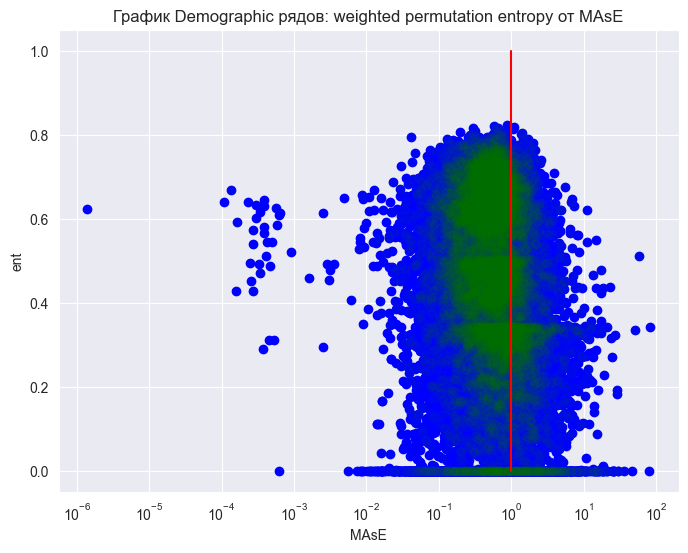

In [61]:
symmetry_ts = ts_finance.loc[ts_finance['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_finance['mase'], ts_finance["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Demographic рядов: weighted permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [62]:
ts_industry = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Industry"]["M4id"].values)]

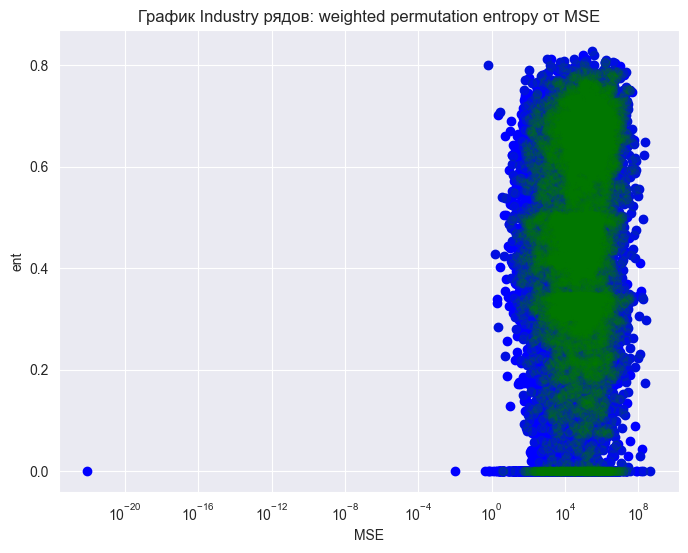

In [63]:
symmetry_ts = ts_industry.loc[ts_industry['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_industry['mse'], ts_industry["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.title('График Industry рядов: weighted permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

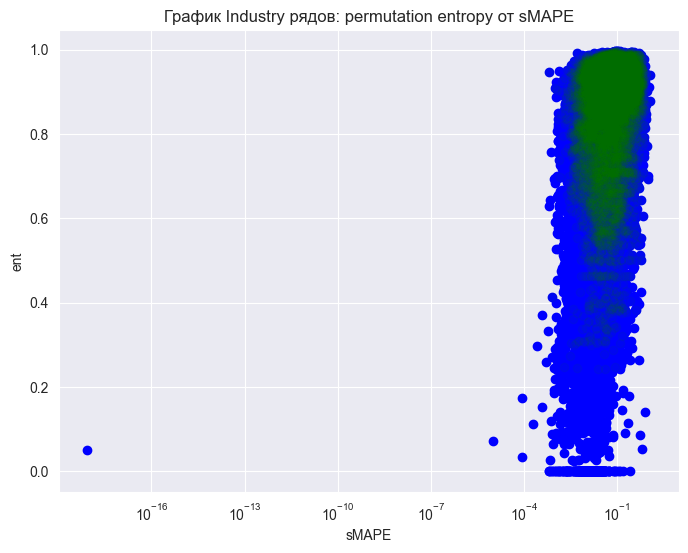

In [64]:
symmetry_ts = ts_industry.loc[ts_industry['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_industry['smape'], ts_industry["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.title('График Industry рядов: permutation entropy от sMAPE')
plt.semilogx()
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

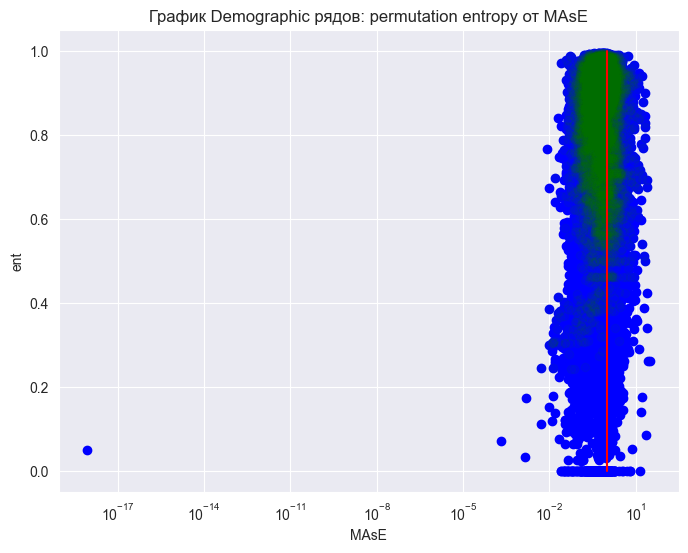

In [65]:
symmetry_ts = ts_industry.loc[ts_industry['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_industry['mase'], ts_industry["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Demographic рядов: permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

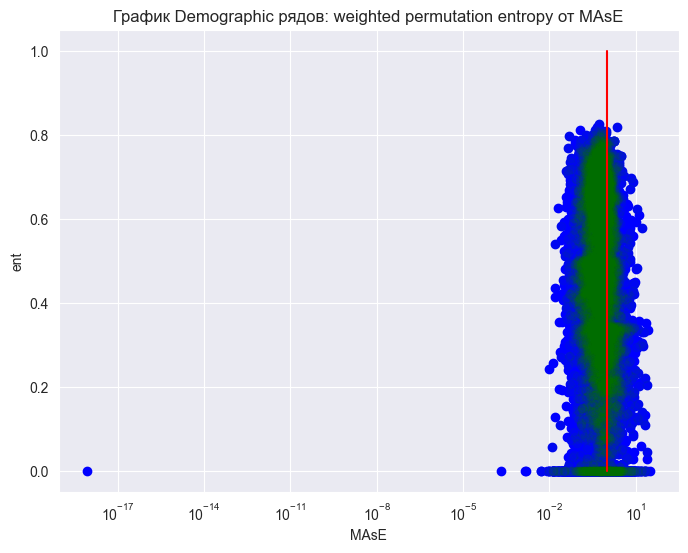

In [66]:
symmetry_ts = ts_industry.loc[ts_industry['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_industry['mase'], ts_industry["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Demographic рядов: weighted permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [68]:
ts_micro = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Micro"]["M4id"].values)]

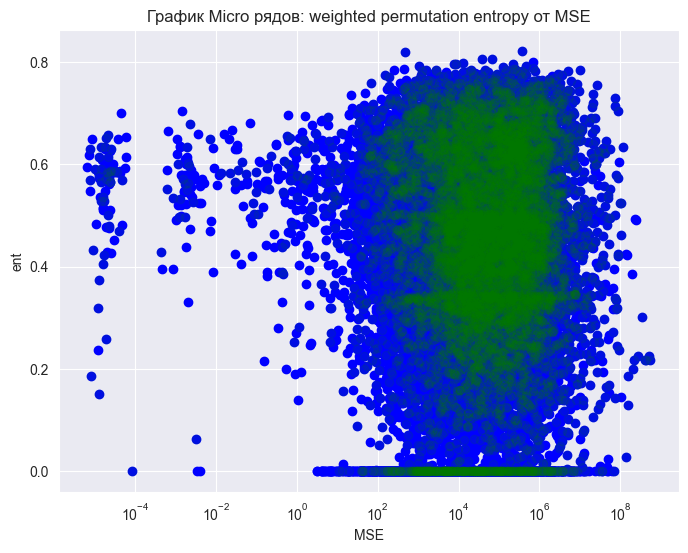

In [70]:
symmetry_ts = ts_micro.loc[ts_micro['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_micro['mse'], ts_micro["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.title('График Micro рядов: weighted permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

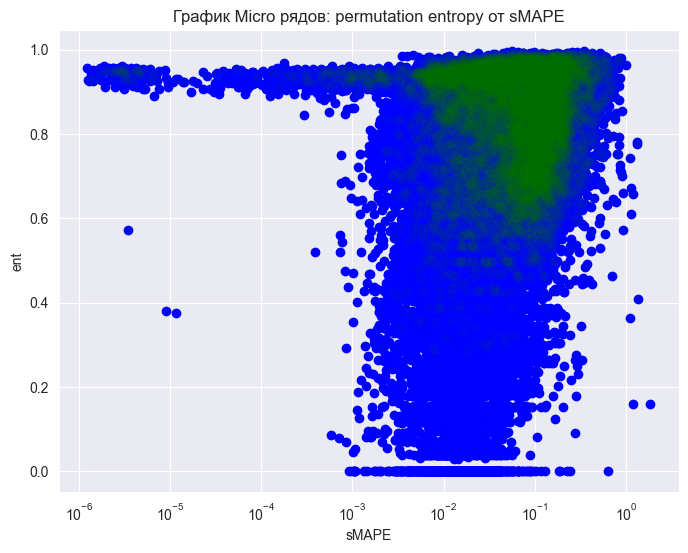

In [72]:
symmetry_ts = ts_micro.loc[ts_micro['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_micro['smape'], ts_micro["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.title('График Micro рядов: permutation entropy от sMAPE')
plt.semilogx()
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

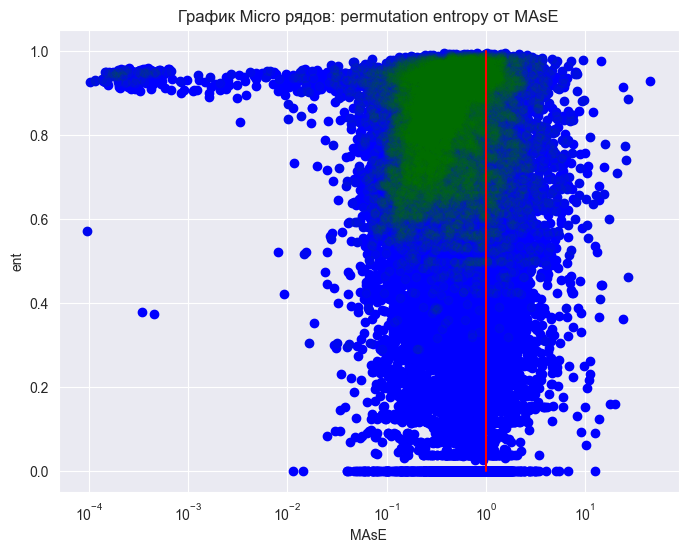

In [74]:
symmetry_ts = ts_micro.loc[ts_micro['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_micro['mase'], ts_micro["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Micro рядов: permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

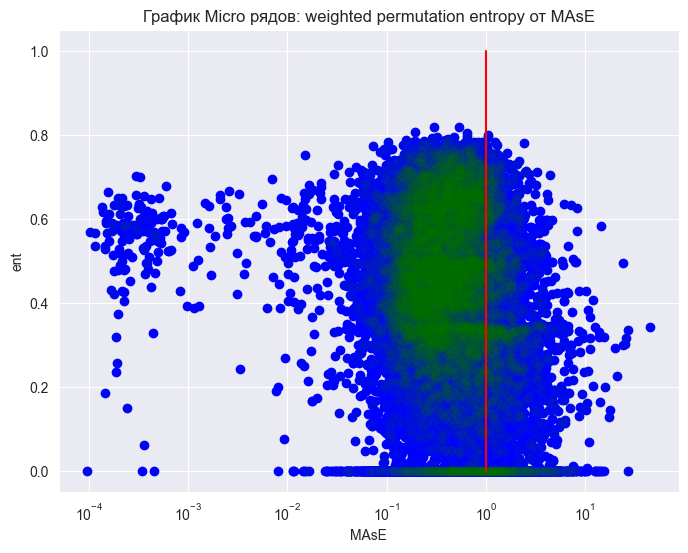

In [76]:
symmetry_ts = ts_micro.loc[ts_micro['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_micro['mase'], ts_micro["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.05)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Micro рядов: weighted permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

In [77]:
ts_other = df_res[df_res["V1"].isin(ts_info[ts_info["category"] == "Other"]["M4id"].values)]

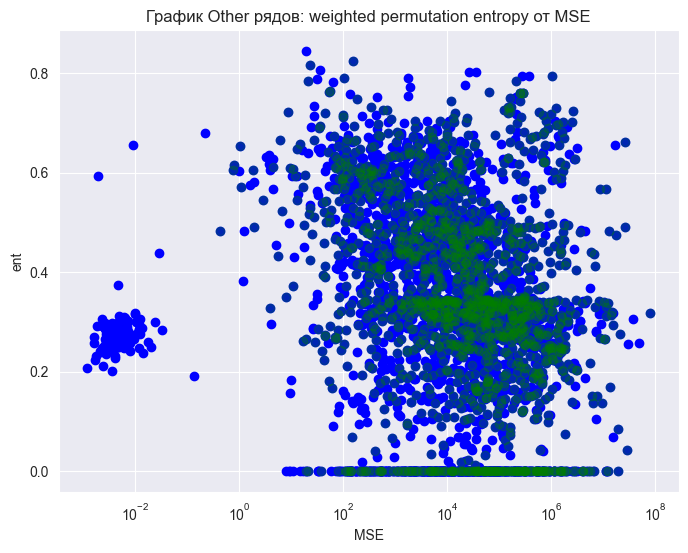

In [79]:
symmetry_ts = ts_other.loc[ts_other['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_other['mse'], ts_other["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mse'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.3)
plt.title('График Other рядов: weighted permutation entropy от MSE')
plt.semilogx()
plt.xlabel('MSE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

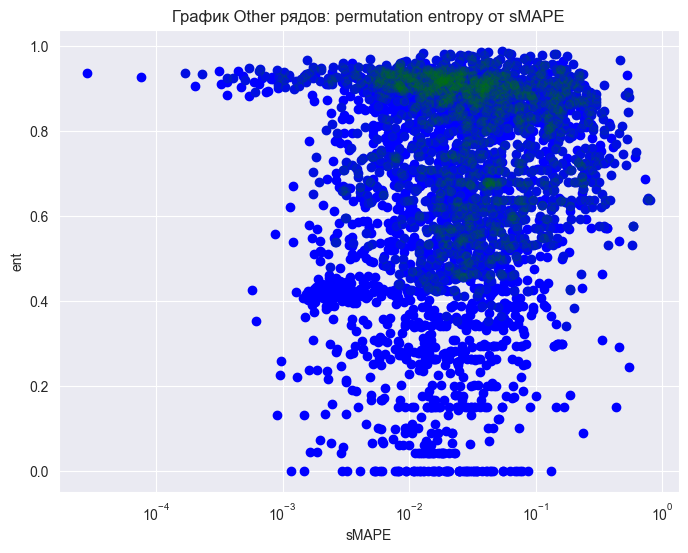

In [81]:
symmetry_ts = ts_other.loc[ts_other['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_other['smape'], ts_other["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['smape'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.title('График Other рядов: permutation entropy от sMAPE')
plt.semilogx()
plt.xlabel('sMAPE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

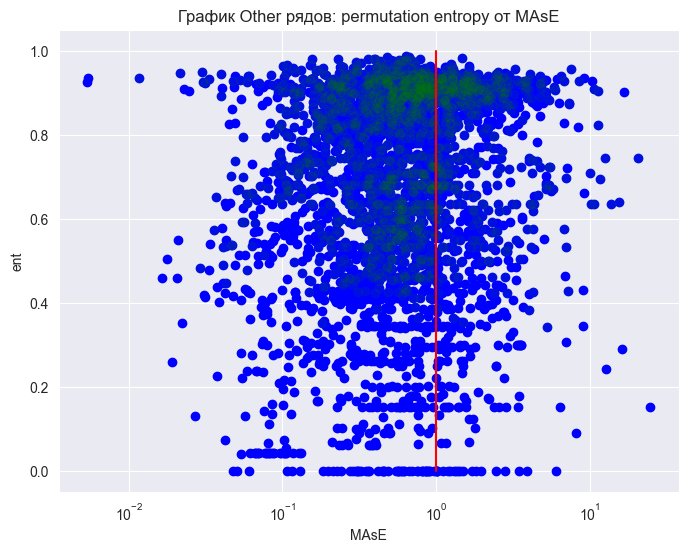

In [83]:
symmetry_ts = ts_other.loc[ts_other['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_other['mase'], ts_other["perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Other рядов: permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()

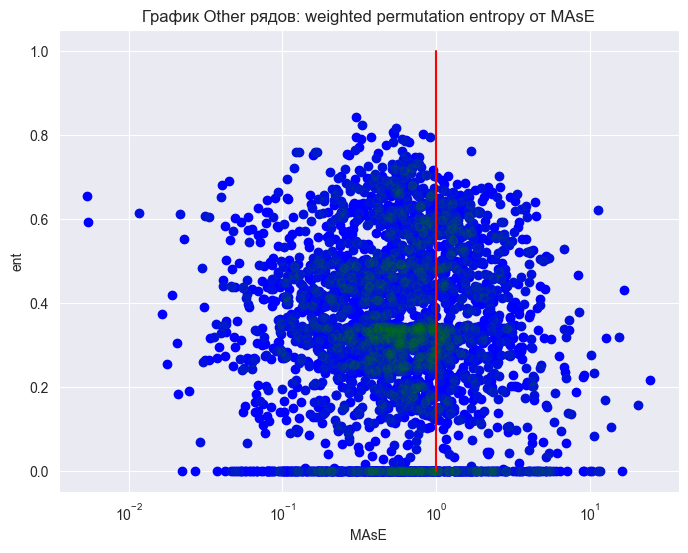

In [84]:
symmetry_ts = ts_other.loc[ts_other['sym_test']]
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(ts_other['mase'], ts_other["w_perm_ent4"], color='blue')
plt.scatter(symmetry_ts['mase'], symmetry_ts['w_perm_ent4'], color='green', label='Highlight', zorder=5, alpha= 0.1)
plt.plot([1]*11, [0.1*i for i in range(11)],zorder=5, color="red")
plt.title('График Other рядов: weighted permutation entropy от MAsE')
plt.semilogx()
plt.xlabel('MAsE')
plt.ylabel('ent')
plt.grid(True)
plt.show()